## Lab 2 (January 17):
### Data Visualization 2 (Aesthetics, Facets, Geometric Objects)

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>

 Today, we are going to look at:
 - [Aesthetics](#aesthetics)
 - [Facets](#facets)
 - [Geometric Objects](#geometric-objects)



# 1. Aesthetics

Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [1]:
install.packages("gapminder") ## Use the install.packages("<PACKAGE NAME>") command to install packages in R
library(gapminder)            ## To load a package (already installed) use the library(<PACKAGE NAME>) command
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=8) ## Set the dimension of all plots 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



> Now we load our `gapminderdata`. Our dataset has **outliers** (few super large values) for GDP per capita (gdpPercap), thus, we filter for the purpose of better visualization. 
Later, we will see how to transform with the `scale_` function. (A possible remedy is to log-transform gdpPercap) 

In [2]:
## filter for only rows with gdpPercap less than 15000
dat = filter(gapminder, gdpPercap < 15000)  
 

## 1.1 Review from Lab 1

Now, let's review lab 1. We look at the general building blocks (7) of ggplot together with the general syntax (structure of code), as recapped below:  

| Element| Description|
|:---   |:---|
|Data    | The dataset being plotted|
|Aesthetics | The scales onto which we map our data|
|Geometries | The visual elements used for our data|
|Facets | Plotting small multiples|
|Statistics | Representations of our data to aid understanding|
|Coordinates | The space on which the data will be plotted|
|Themes | All non-data ink|

_Source: DataCamp_

Syntax:
> `ggplot(data = <DATA>) +`   
>  &nbsp; &nbsp;&nbsp;&nbsp;`<GEOM_FUNCTION>( `  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`mapping = aes(<MAPPINGS>),`  
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`stat = <STAT>, `  
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`position = <POSITION>`  
>  &nbsp; &nbsp;&nbsp;&nbsp;`) + `   
> &nbsp; &nbsp;&nbsp;&nbsp; `<COORDINATE_FUNCTION> + `   
> &nbsp; &nbsp;&nbsp;&nbsp;` <FACET_FUNCTION> +`  
>  &nbsp; &nbsp;&nbsp;&nbsp;`<LABS>`   



### Example 1.1 (Mapping a geom attribute to a value)

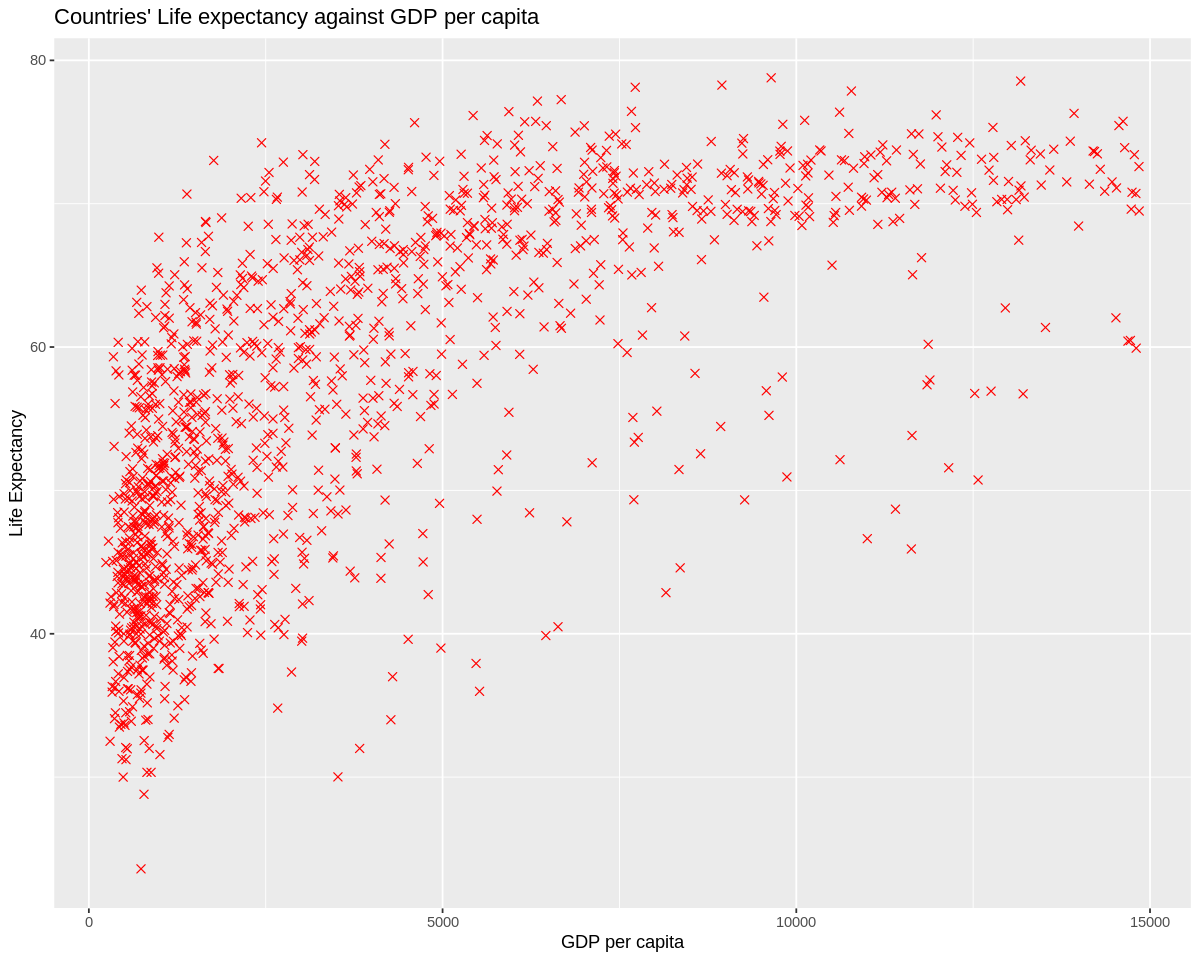

In [3]:
## We make a plot with an attribute outside of the aes() function
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp), color = "red", size = 2, shape = 4) +  
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")

### Exapmle 1.2 (Mapping a geom to a variable)

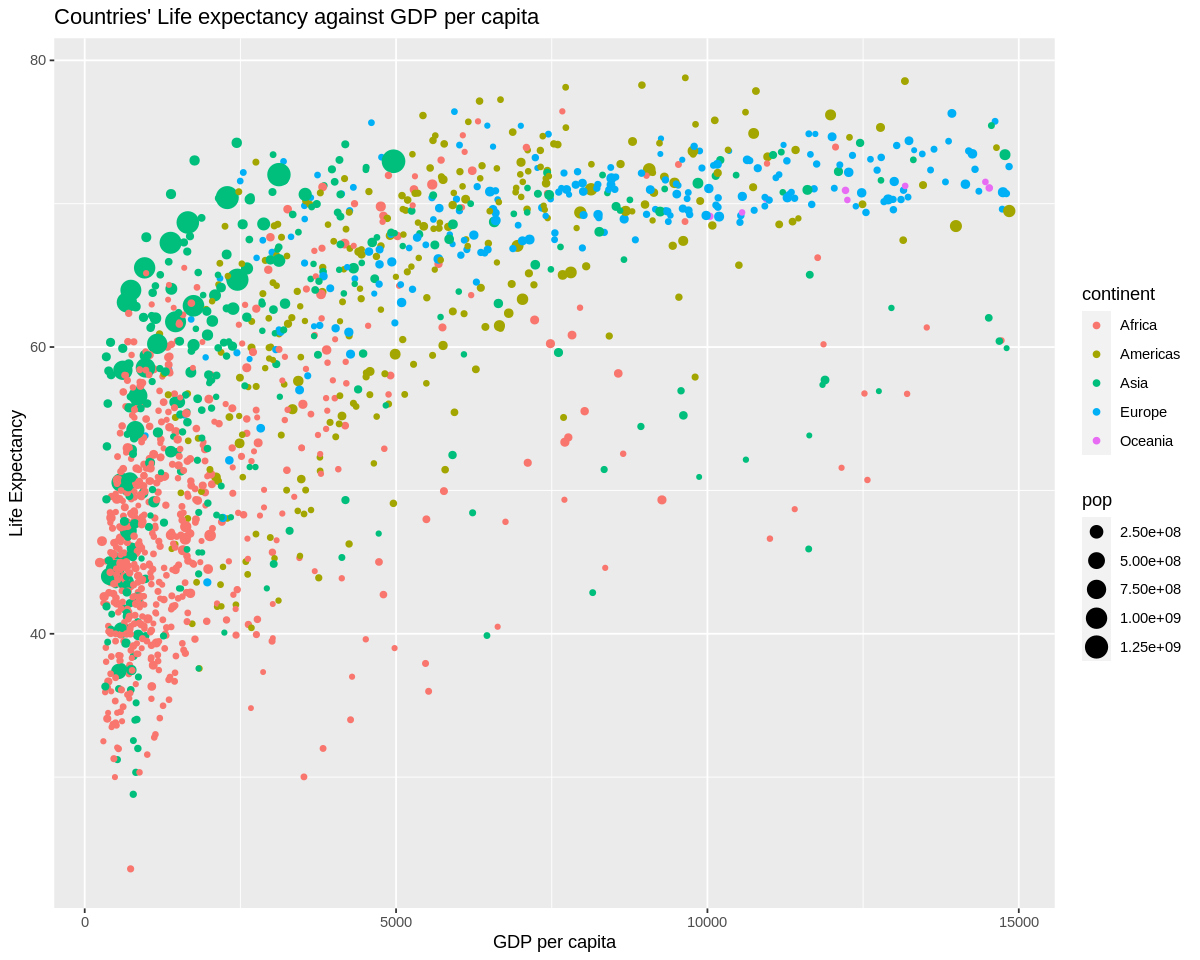

In [4]:
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +  
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")
## add more transparent theme

---

## 1.2 Continuous vs Discrete (categorical) variables 
In ggplot, some geom attributes can only be mapped to either continuous or dicrete variables. For example, the `shape` attribute cannot be mapped to a continuous variable.  

**_Challenge_:** Try running the code below. What do you observe?

ERROR while rich displaying an object: Error: A continuous variable can not be mapped to shape

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

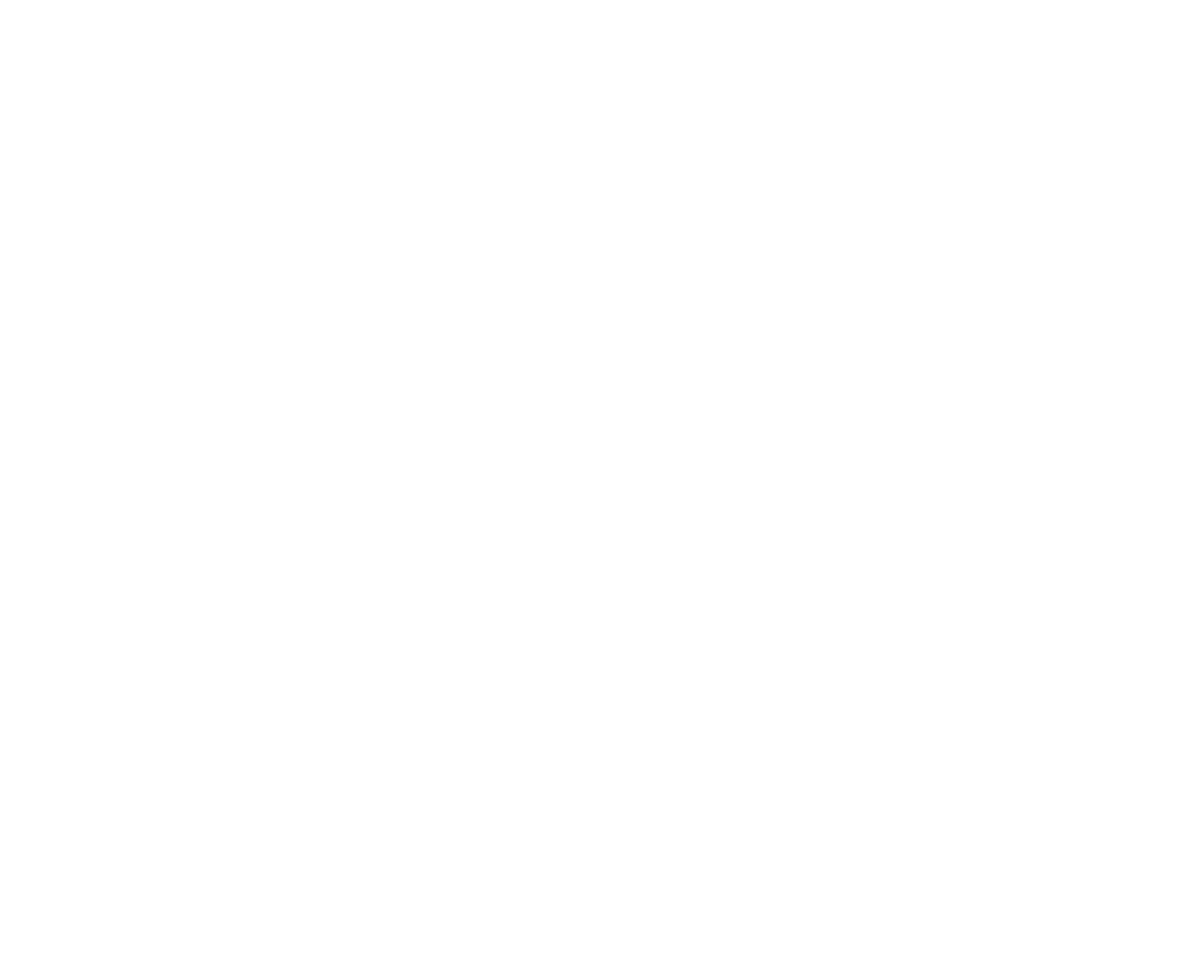

In [5]:
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp, color = continent, size = pop, shape = 4)) +  
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")

Below, I summarize some common geom attributes of aesthetics (`aes`) and their variable type validy:


| Aesthetic| Description| Continuous | Categorical|
|:---   |:---|:---|:---|
|x | X axis position| ✅ | ❌  |
|x | Y axis position| ✅ | ❌  |
|labels    | Text on a plot or axes| ❌ | ✅ |
|fill | Fill colour| ✅ | ✅ |
|shape | Shape of point| ❌ | ✅ |
|alpha | Transparency| ✅ | ✅|
|linetype |Line dash pattern| ❌ | ✅ |
|size | Diameter of points, thickness of lines| ✅ | ✅ |
|color | Color of dots, outlines of other shapes | ✅ | ✅ |

_Source: DataCamp_

### Example 1.3 (coloring by a continuous variable)

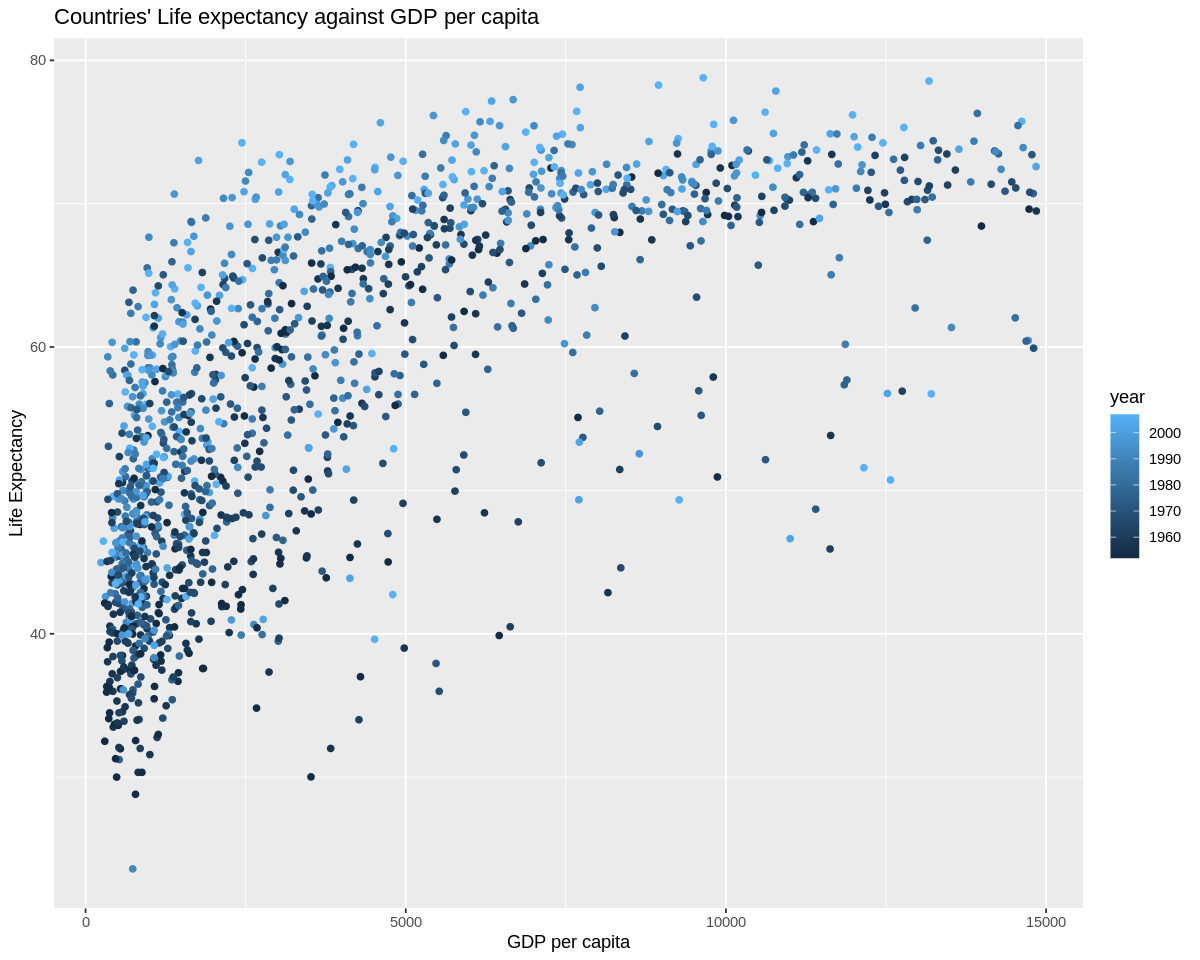

In [6]:
## when we color by continuous variables, we get a gradient
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp, color = year)) +  
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")
     

### Example 1.4 (coloring by a categorical variable)

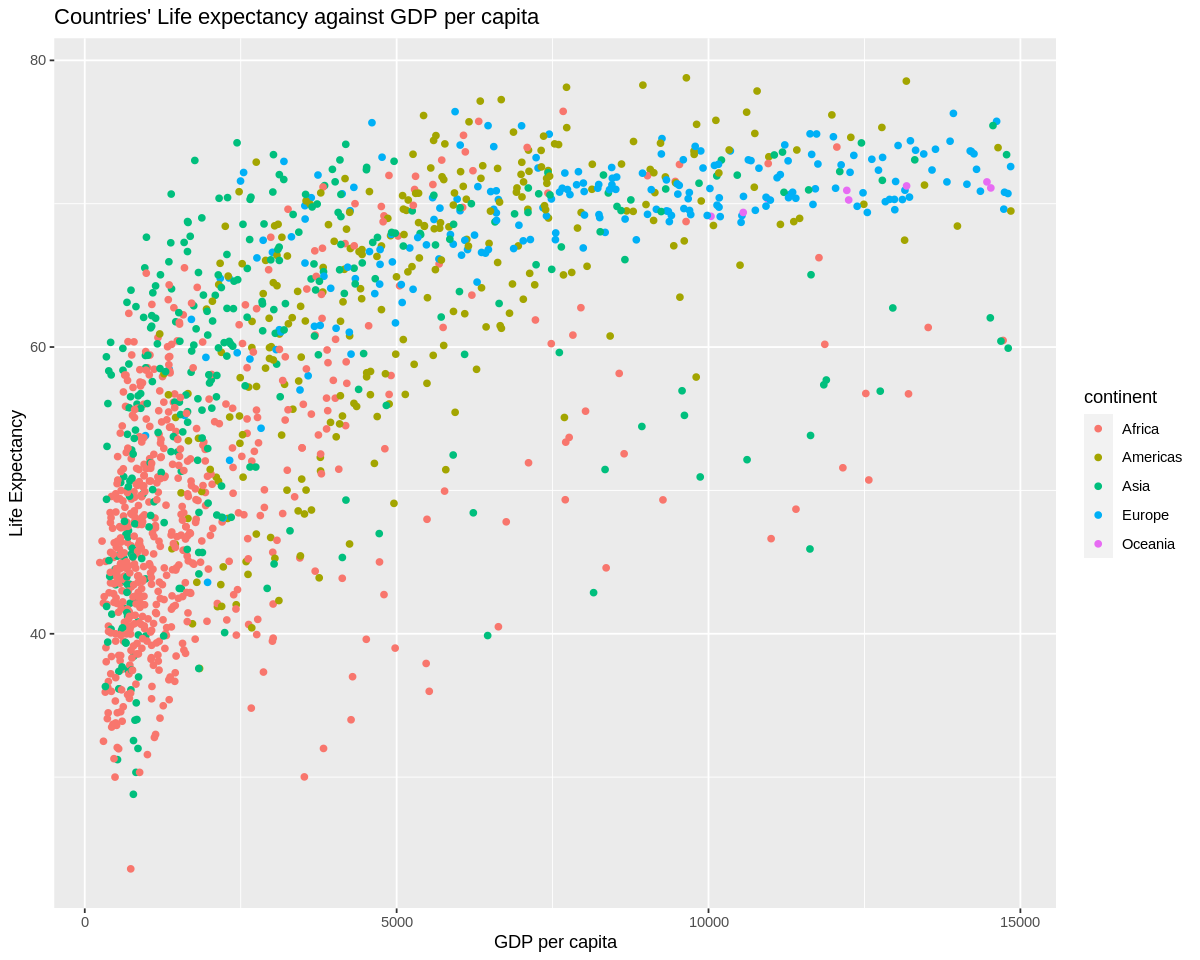

In [7]:
## when we color by continuous variables, we get a countables of size of levels of the variable
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +  
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")

<br>
<br>
<br>    


# 2. Facets

**Motivation:** Let's make lineplots for each continent. We see from the figure below that it can be a hassle trying to distinguish which line corresponds to which color (continent). It is even worse when you map to a categorical variable with several levels. In such situations, facetting comes to save the day!

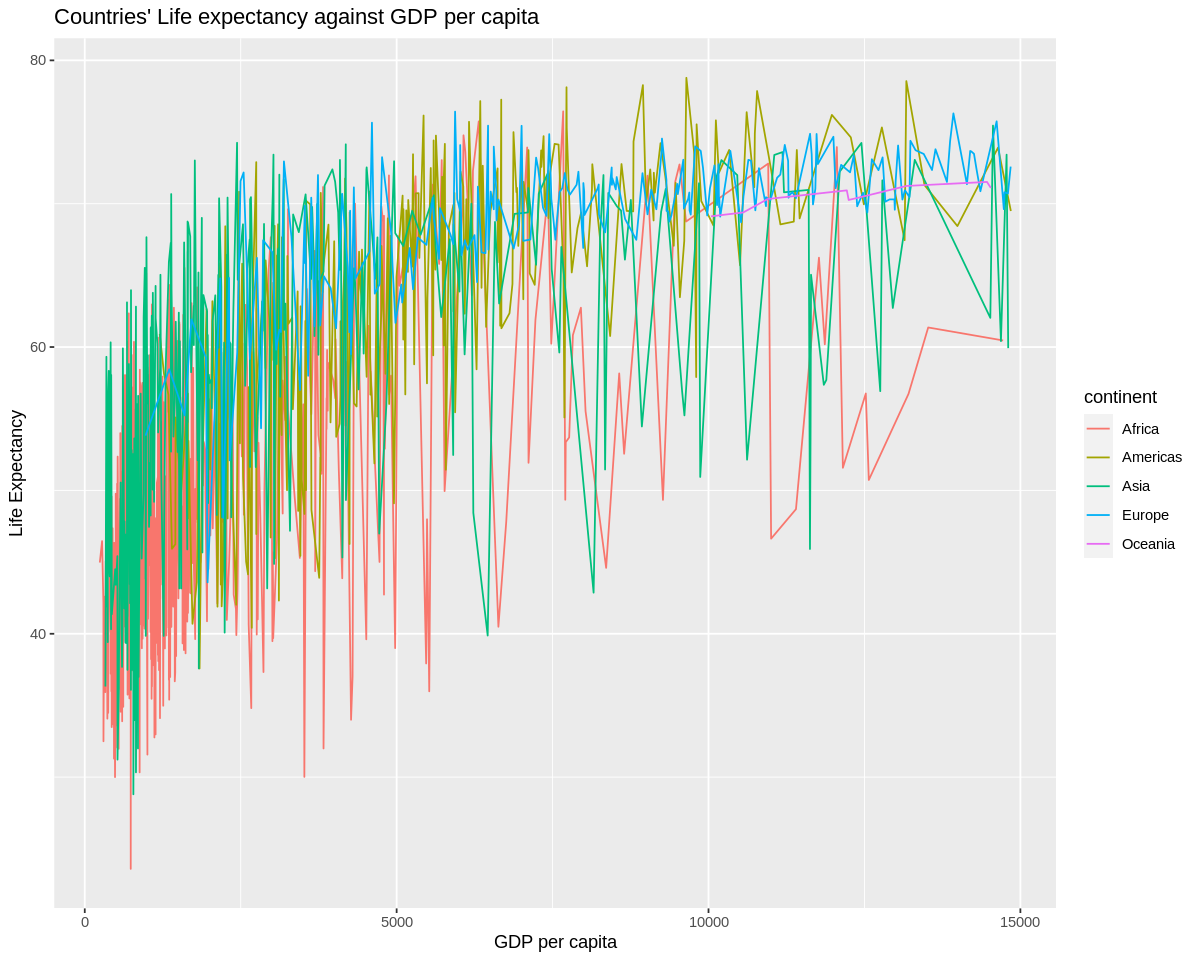

In [8]:
ggplot(data = dat) +
  geom_line(mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +  
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")

There are two major types of faceting viz:
- `facet_wrap`
- `facet_grid`

## IMPORTANT NOTE:  
- A common practice in plotting is to store a base plot and the add on layers as needed. This is called _layering_, and I will be using this technique to make our plotting simpler in subsequent examples.
- Again, every `geom_` need data as an argument. To make our lives simpler once again, I will henceforth define the data attribute in the `ggplot` function, unless we need a separate dataset for a particular geometry (see example 2.6)

## 2.1 Facet wrap
This “wraps” a 1d ribbon of panels into 2d.  

Common attributes:
- ncol: controls how many columns to spread your plots.
- nrow: controls how many rows to spread your plots.
- scales: lets axis limits vary across facets. Values to this attribute include "free", "fixed, "free_x", "free_y" (see example 2.3)

**Use only one at a time**

### Example 2.1 (classical facet wrap)

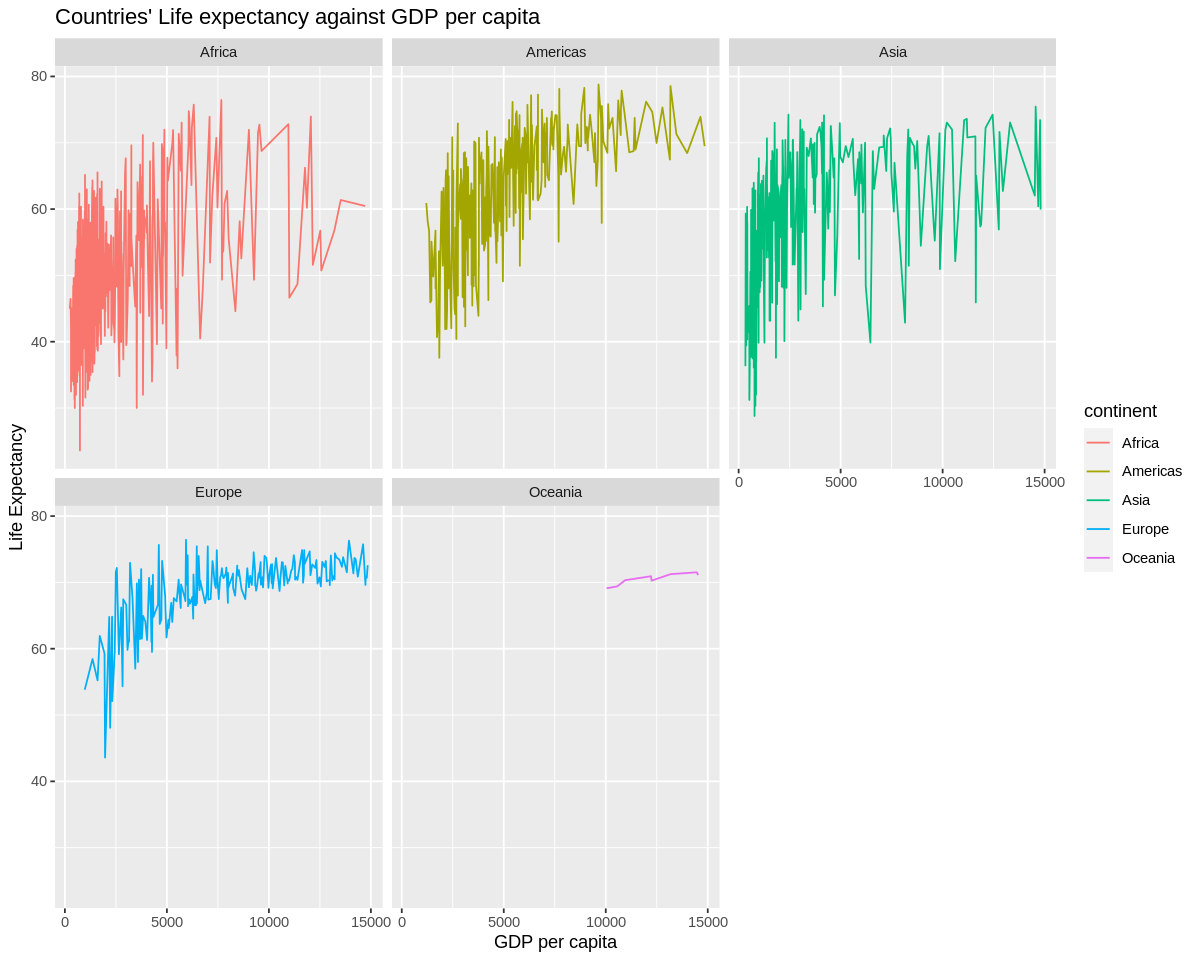

In [9]:
p <- ggplot(data = dat, mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) 
p + geom_line() +
    facet_wrap(~ continent) +
    labs(x     = "GDP per capita",
         y     = "Life Expectancy",
         title = "Countries' Life expectancy against GDP per capita") 

### Example 2.2 (Specifying number of columns)

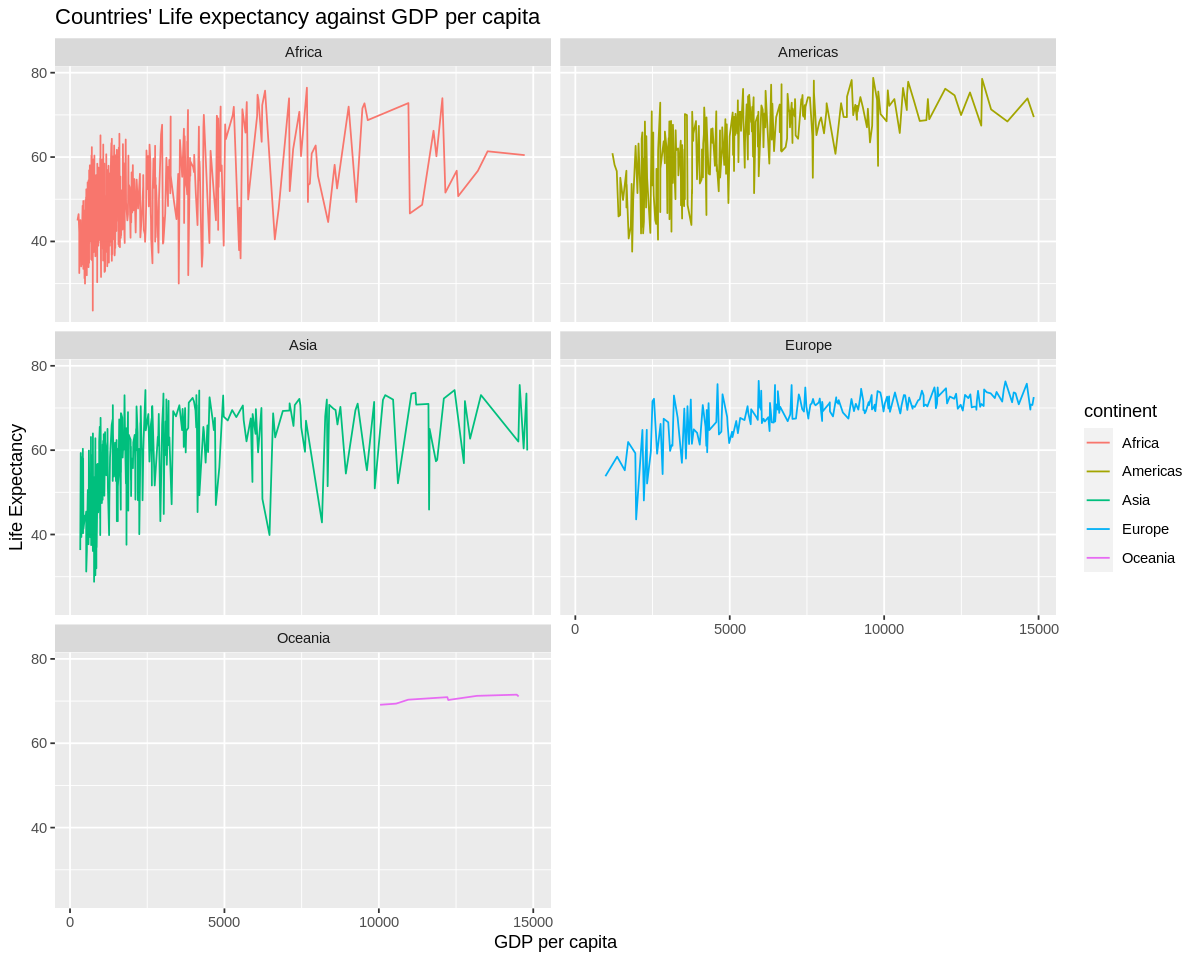

In [10]:
p <- ggplot(data = dat, mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) 
p + geom_line() +
    facet_wrap(~ continent, ncol = 2) +
    labs(x     = "GDP per capita",
         y     = "Life Expectancy",
         title = "Countries' Life expectancy against GDP per capita") 

### Example 2.3 (Freeing axis - make each defined axis have its own ticks) 

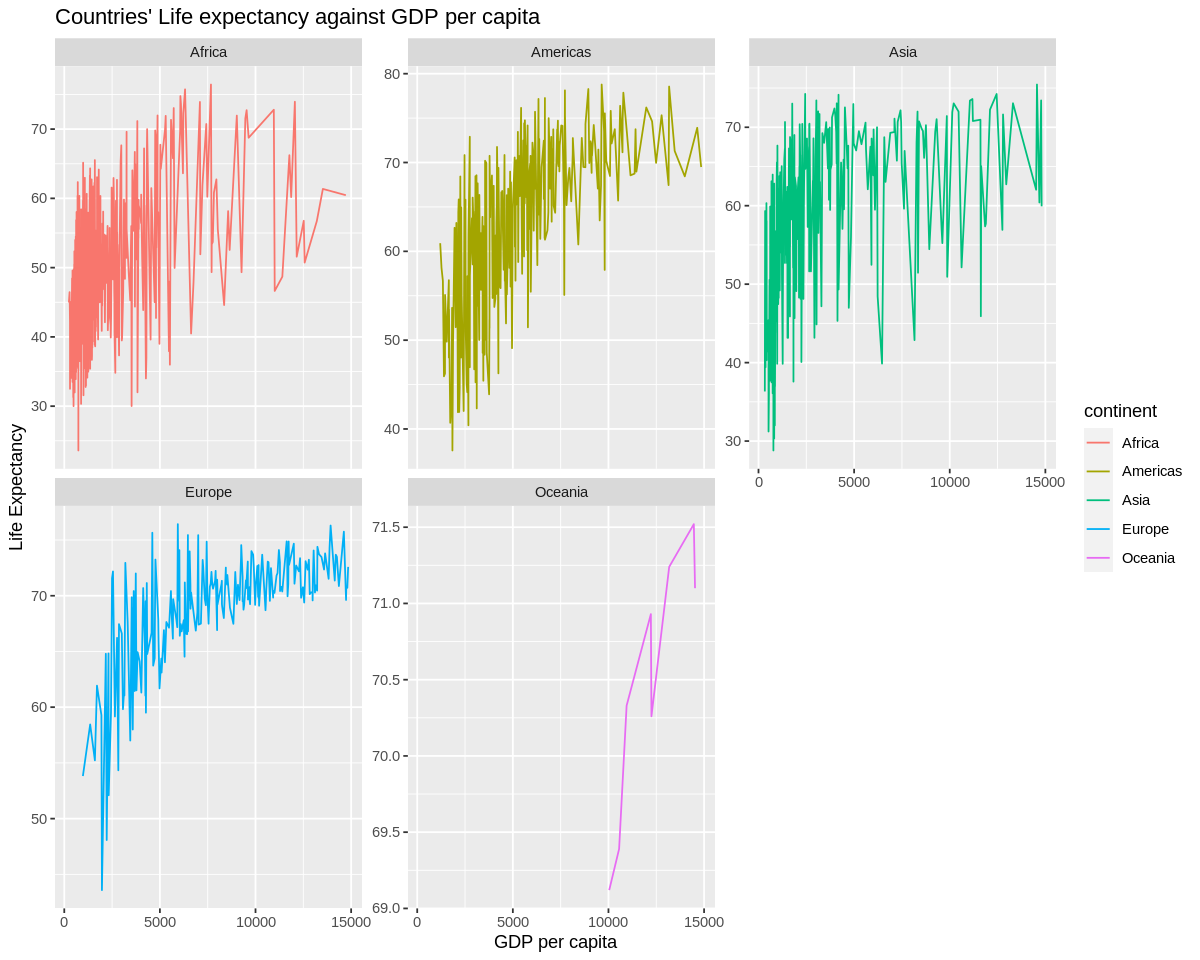

In [11]:
p <- ggplot(data = dat, mapping = aes(x = gdpPercap, y = lifeExp, color = continent))  
p + geom_line() + 
    facet_wrap(~ continent, scales = "free_y") + ## y-axis gets its own ticks for each subplot
    labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")

## 2.2 Facet grid
This lays out plots in a 2d grid. It is basically based on the "row" by "columns" principle as `row_variable ~ column_variable` 

formulars include:
- `a ~ b`: spreads variable `a` across columns and variable `b` down rows.
- `. ~ b`: spreads the values of variable `b` across the columns
- `a ~ .`: spreads the values of variable  `a` down the rows
- `a + b ~ a + d`: multiple spread. (See example 2.5) 



**Note that when a row or column variable is not specified, we replcace it with a dot(.)**

<br> <br>

### Example 2.4 (spread rows with "year" and columns with "continent")

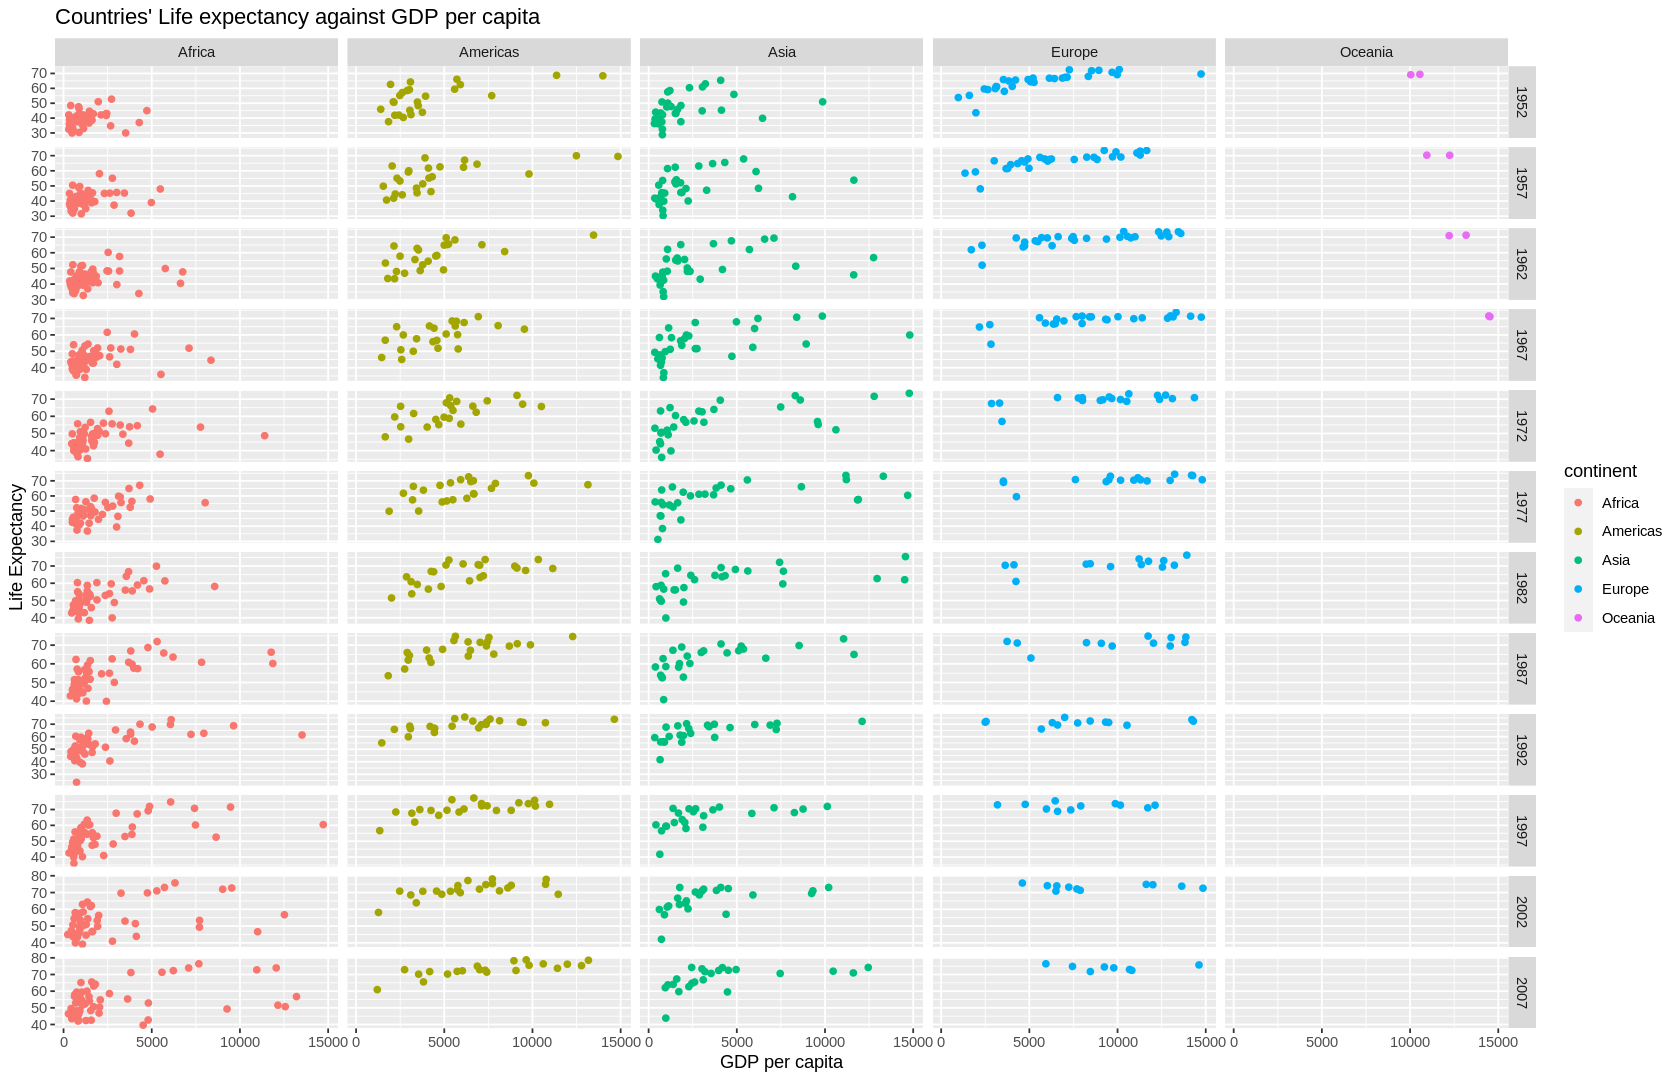

In [12]:
options(repr.plot.width=14, repr.plot.height=9) ## Make plote larger just for this purpose
p <- ggplot(data = dat, mapping = aes(x = gdpPercap, y = lifeExp, color = continent))  
p + geom_point() + 
    facet_grid(year ~ continent, scales = "free_y") + ## y-axis gets its own ticks for each subplot
    labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")

### Example 2.5 (Multiple spread)

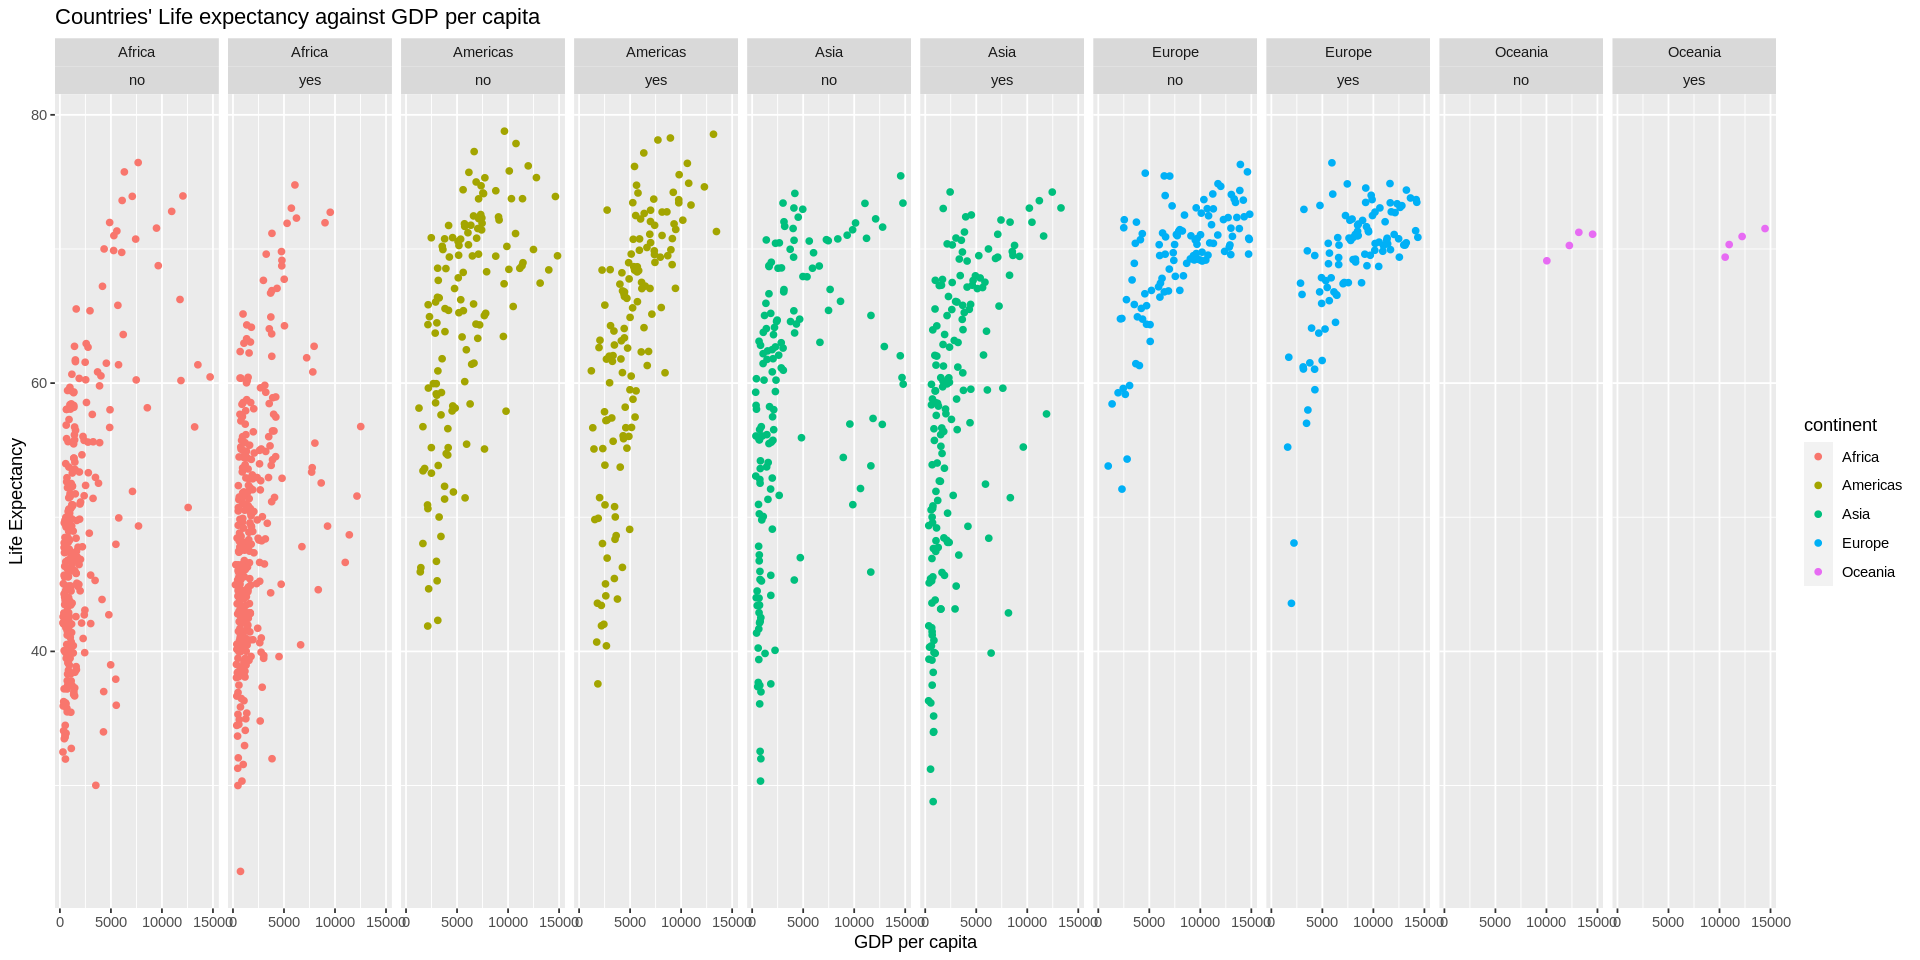

In [13]:
## I will create a dummy variable with just yes or no values just to demonstrate this example
dat$status = sample(x = c("yes", "no"), size = dim(dat)[1], replace = T, prob = c(0.5, 0.5)) 

options(repr.plot.width=16, repr.plot.height=8) ## widen plot dimensions just for this example
p <- ggplot(data = dat, mapping = aes(x = gdpPercap, y = lifeExp, color = continent))  
p + geom_point() + 
    facet_grid(. ~ continent + status, scales = "free_y") + ## y-axis gets its own ticks for each subplot
    labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita")

<br>

## 2.3 Multi-layering with different dataset

This example is rather a very interesting one! We are going to superimpose the mean of each continent's `gdpPercap` and `lifeExp` on our previous plots. This will come as a new dataset, which we create below:

**You do not need to understant how the dataset is created. This will be treated thoroughly under Data Manipulation in the coming weeks**

In [14]:
## Average the gdpPercap and lifeExp as a new dataset names avg_by_continent

(avg_by_continent = dat %>% group_by(continent) %>% 
  summarise(mean_gdpPercap = mean(gdpPercap), mean_lifeExp = mean(lifeExp)))

continent mean_gdpPercap mean_lifeExp
1 Africa     2027.418      48.80261    
2 Americas   5594.712      63.76796    
3 Asia       3336.188      57.53777    
4 Europe     8131.118      69.06393    
5 Oceania   12272.021      70.48625

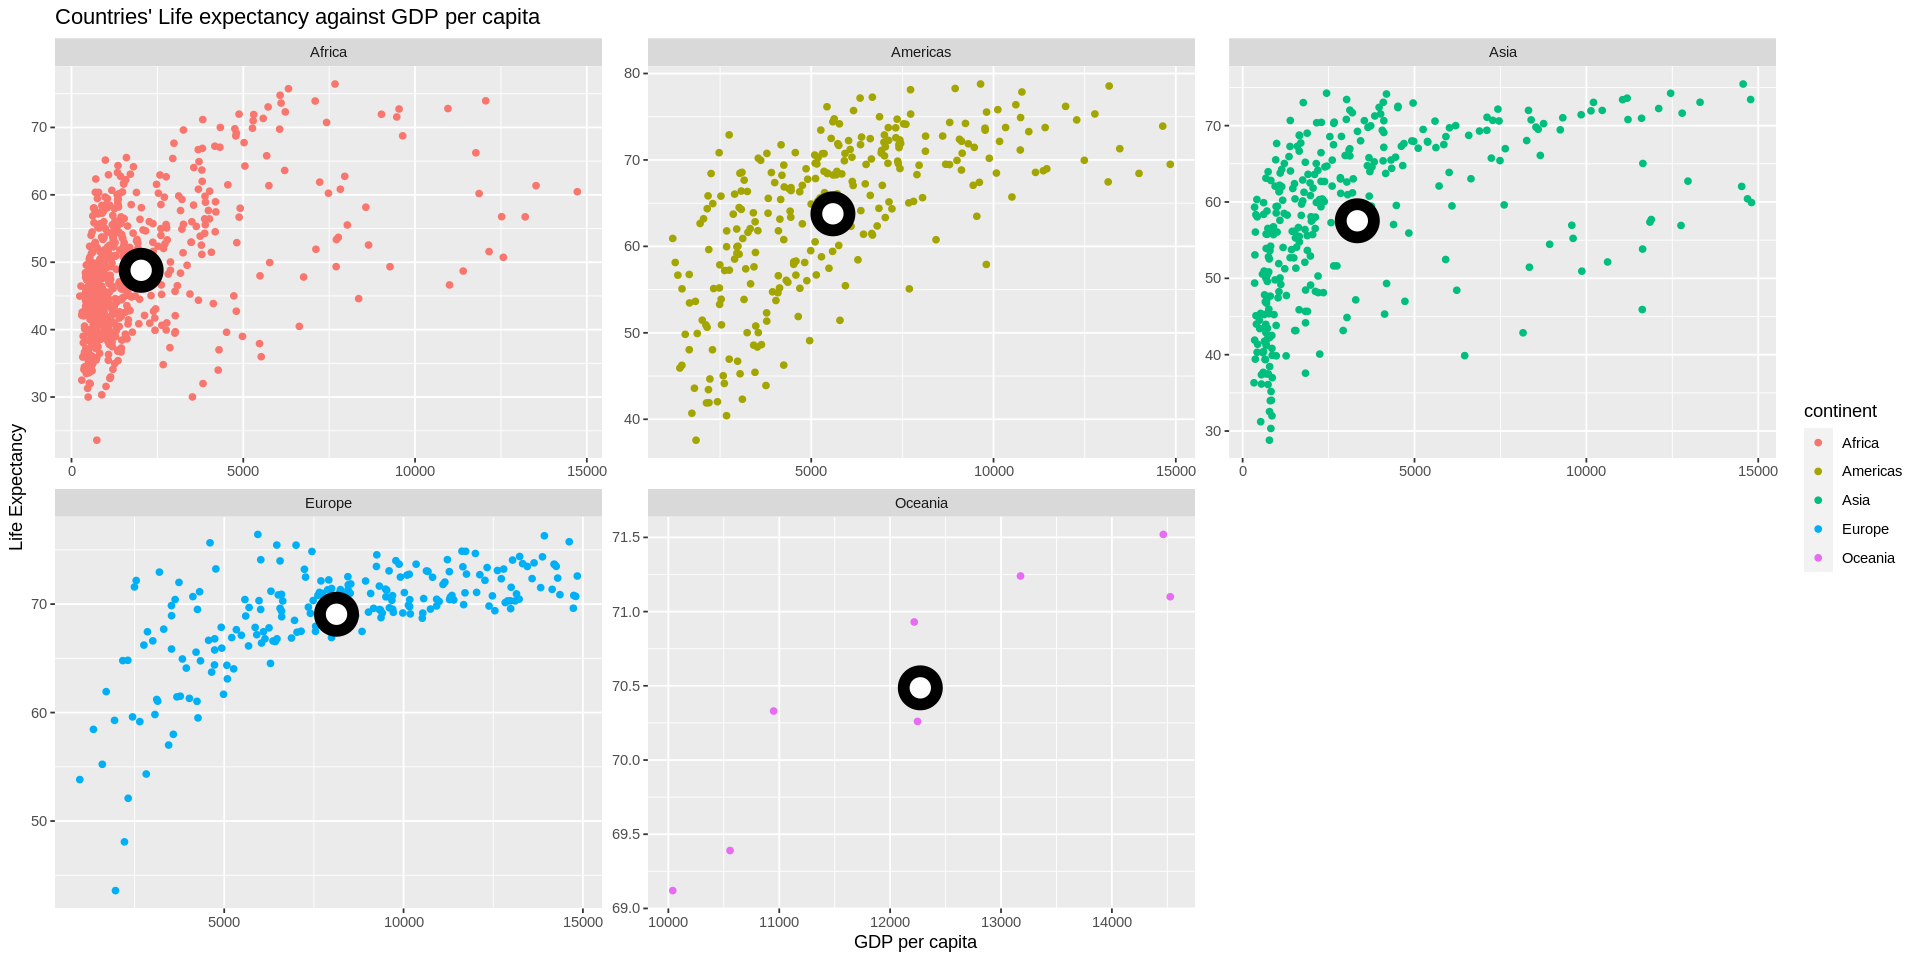

In [15]:
# For shapes that have a border (like 21), you can colour the inside and
# outside separately. Use the stroke aesthetic to modify the width of the
# border
p = ggplot(data = dat, mapping = aes(x = gdpPercap, y = lifeExp, color = continent))   
p + geom_point() +
    geom_point(data = avg_by_continent, mapping = aes(x = mean_gdpPercap, y = mean_lifeExp),
              color = "black", size = 6, fill = "white", stroke = 5, shape = 21) + 
    facet_wrap(~ continent, scales = "free") +
    labs(x     = "GDP per capita",
         y     = "Life Expectancy",
         title = "Countries' Life expectancy against GDP per capita") 

<br> <br>


# 3. Geometric Objects

We conclude our lab with the `geom_smooth` geometric object. Simply put, we fit regression models to our data. The remarkable arguments of `geom_smooth` are:

- method: Smoothing method (function) to use, accepts either NULL or a character vector, e.g. `"lm"`, `"glm"`, `"gam"`, `"loess"` or a function, e.g. MASS::rlm or mgcv::gam, stats::lm, or stats::loess. `"auto"` is also accepted for backwards compatibility. It is equivalent to `NULL`.

- formula: Formula to use in smoothing function, eg. `y ~ x, y ~ poly(x, 2)`, `y ~ log(x)`. `NULL` by default, in which case `method = NULL` implies `formula = y ~ x` when there are fewer than 1,000 observations and `formula = y ~ s(x, bs = "cs")` otherwise.

- se: Display confidence interval around smooth? options inlue `"TRUE"` or `"FALSE"`.

**Note**: The first two arguments are given for information purposes. You do not need to know these as those methods are usually introduced in higher level statistical classes. However, if you wish to explore their usage, you can find more info [here](https://ggplot2.tidyverse.org/reference/geom_smooth.html).





<br>

### Example 3.1 (Fitting Linear Smooth for the entire dataset with confidence band) 

`geom_smooth()` using formula 'y ~ x'



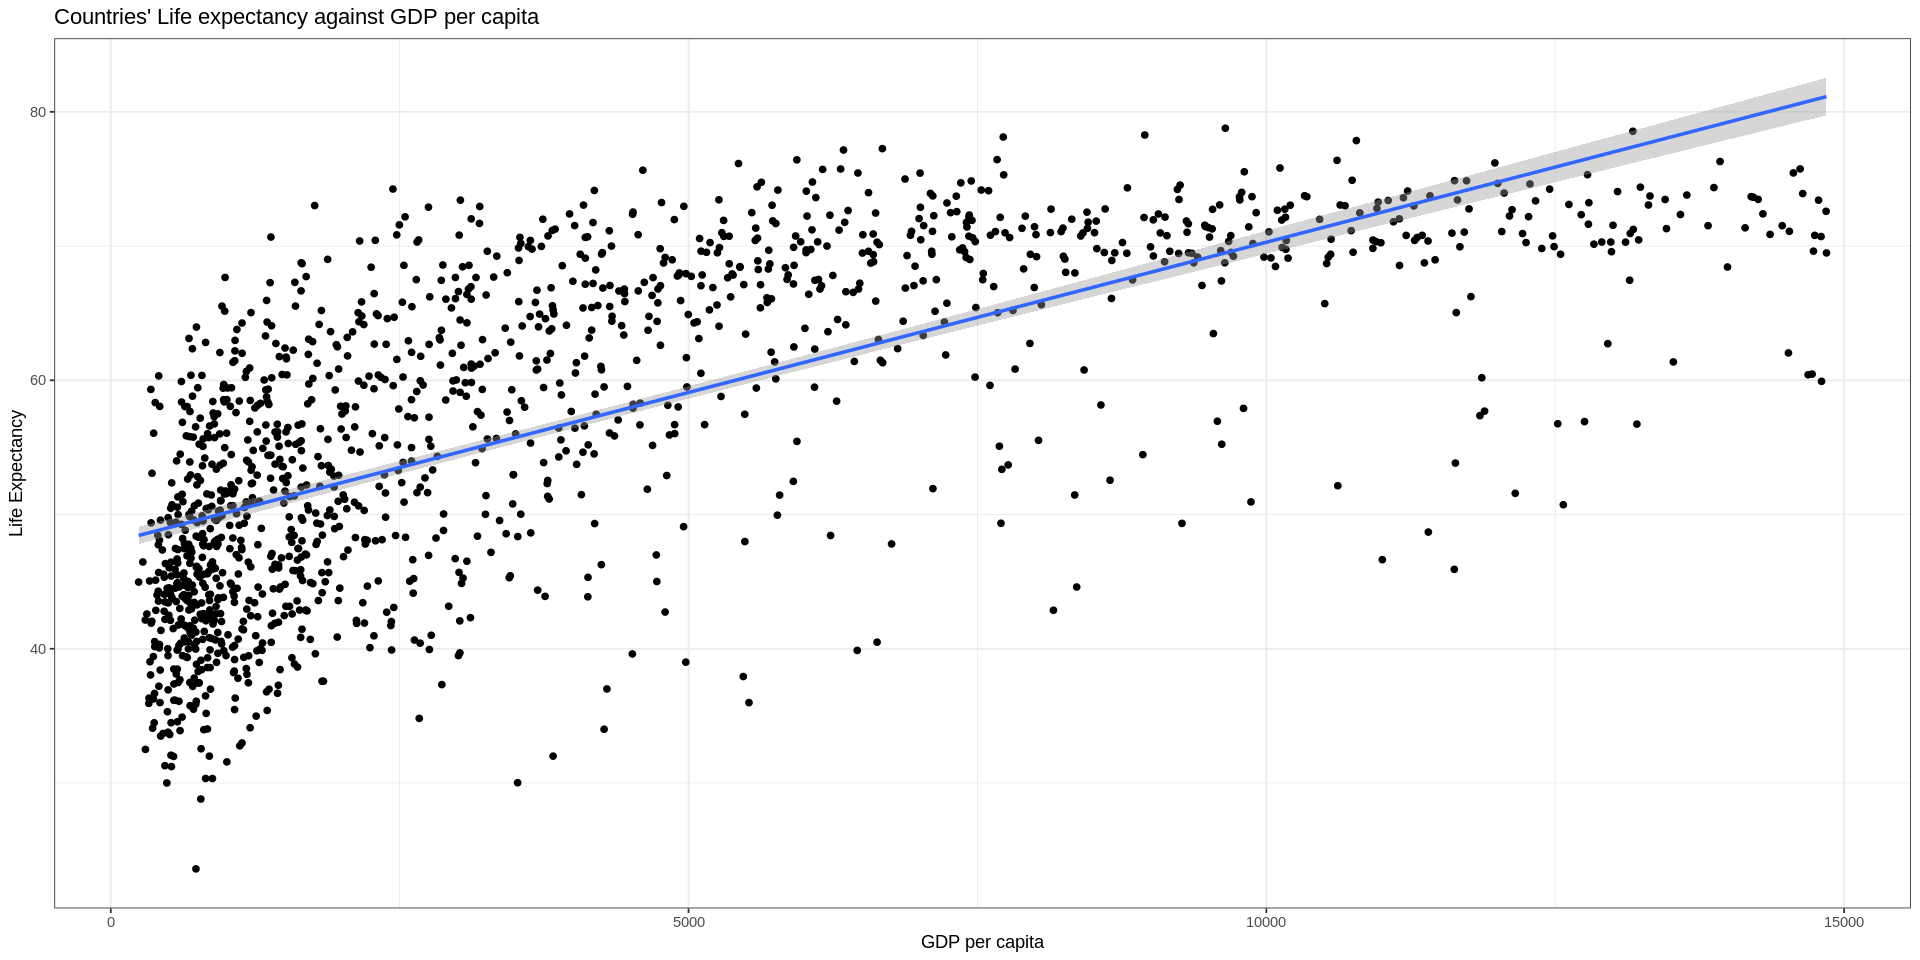

In [16]:
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_smooth(mapping = aes(x = gdpPercap, y = lifeExp), method = "lm") +  ## look at the method argument used here "lm" means linear smooth
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita") + 
  theme_bw()

<br>

### Example 3.2 (simple linear model for the entire dataset without confidence band)

`geom_smooth()` using formula 'y ~ x'



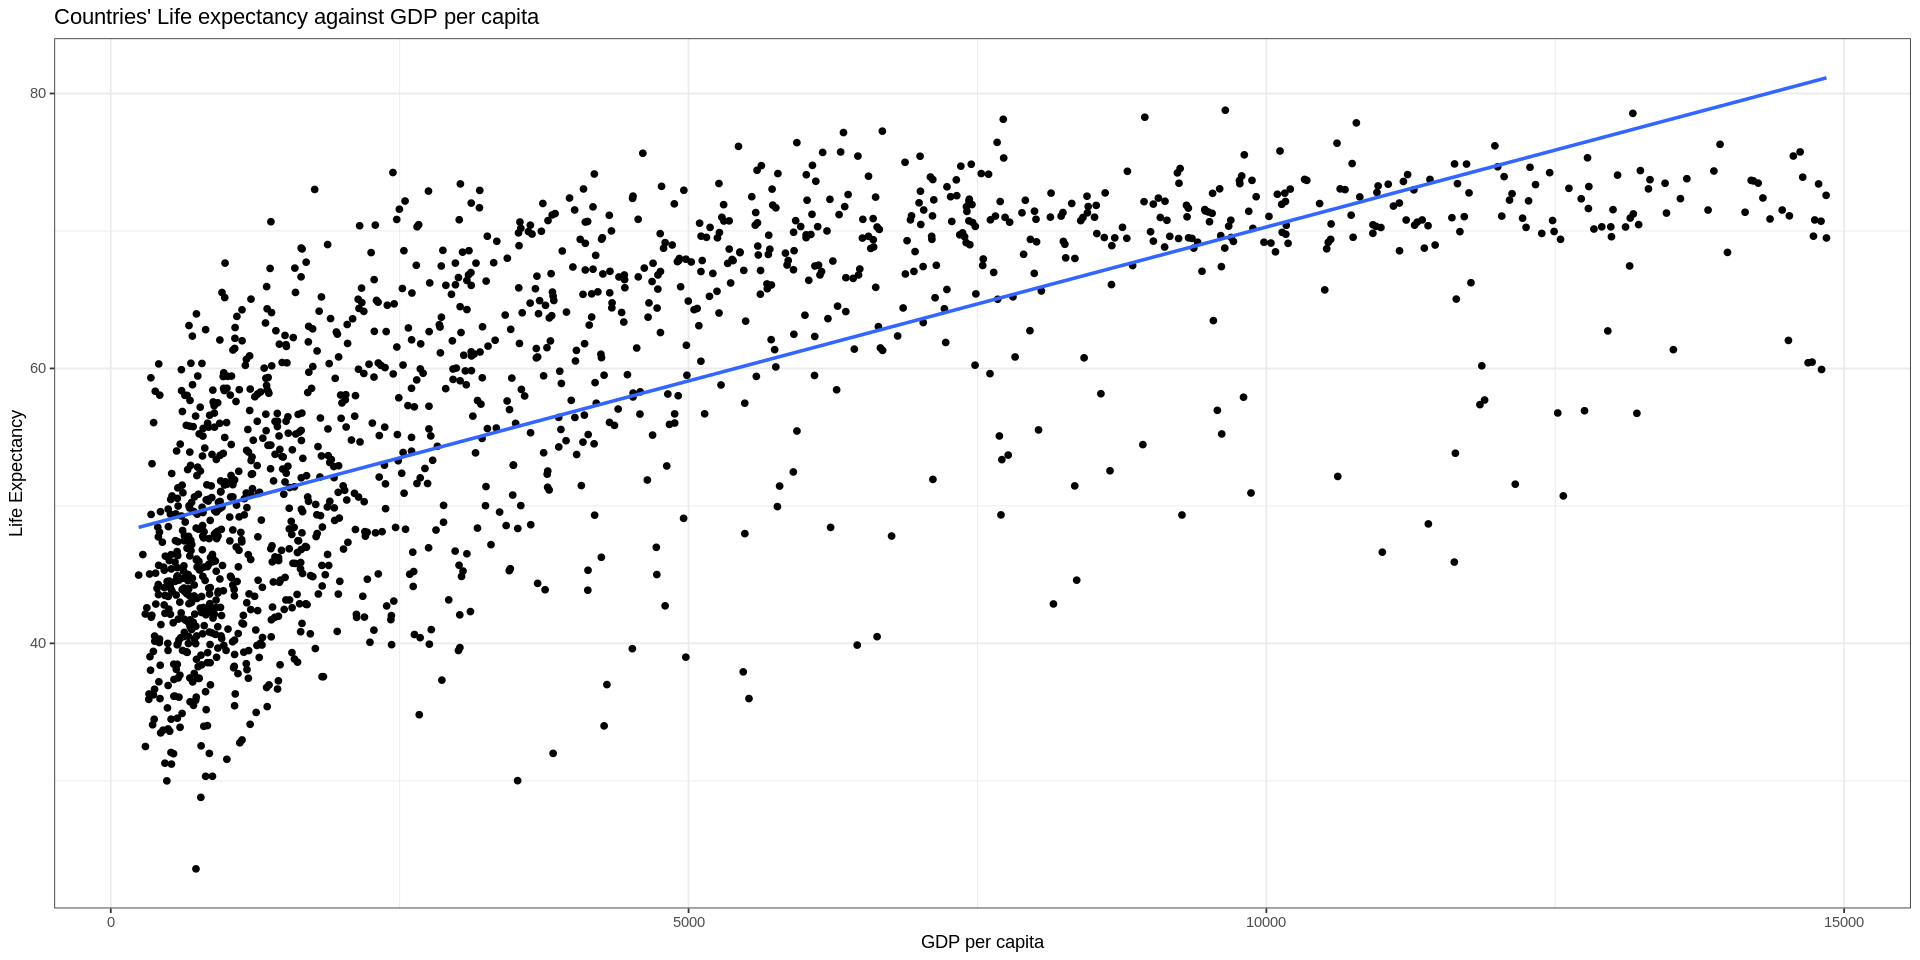

In [17]:
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_smooth(mapping = aes(x = gdpPercap, y = lifeExp), method = "lm", se = F) +  ## setting confidence band to FALSE
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita") + 
  theme_bw()

<br>

### Example 3.3 (Local Smooth for the entire dataset with confidence band)

`geom_smooth()` using formula 'y ~ x'



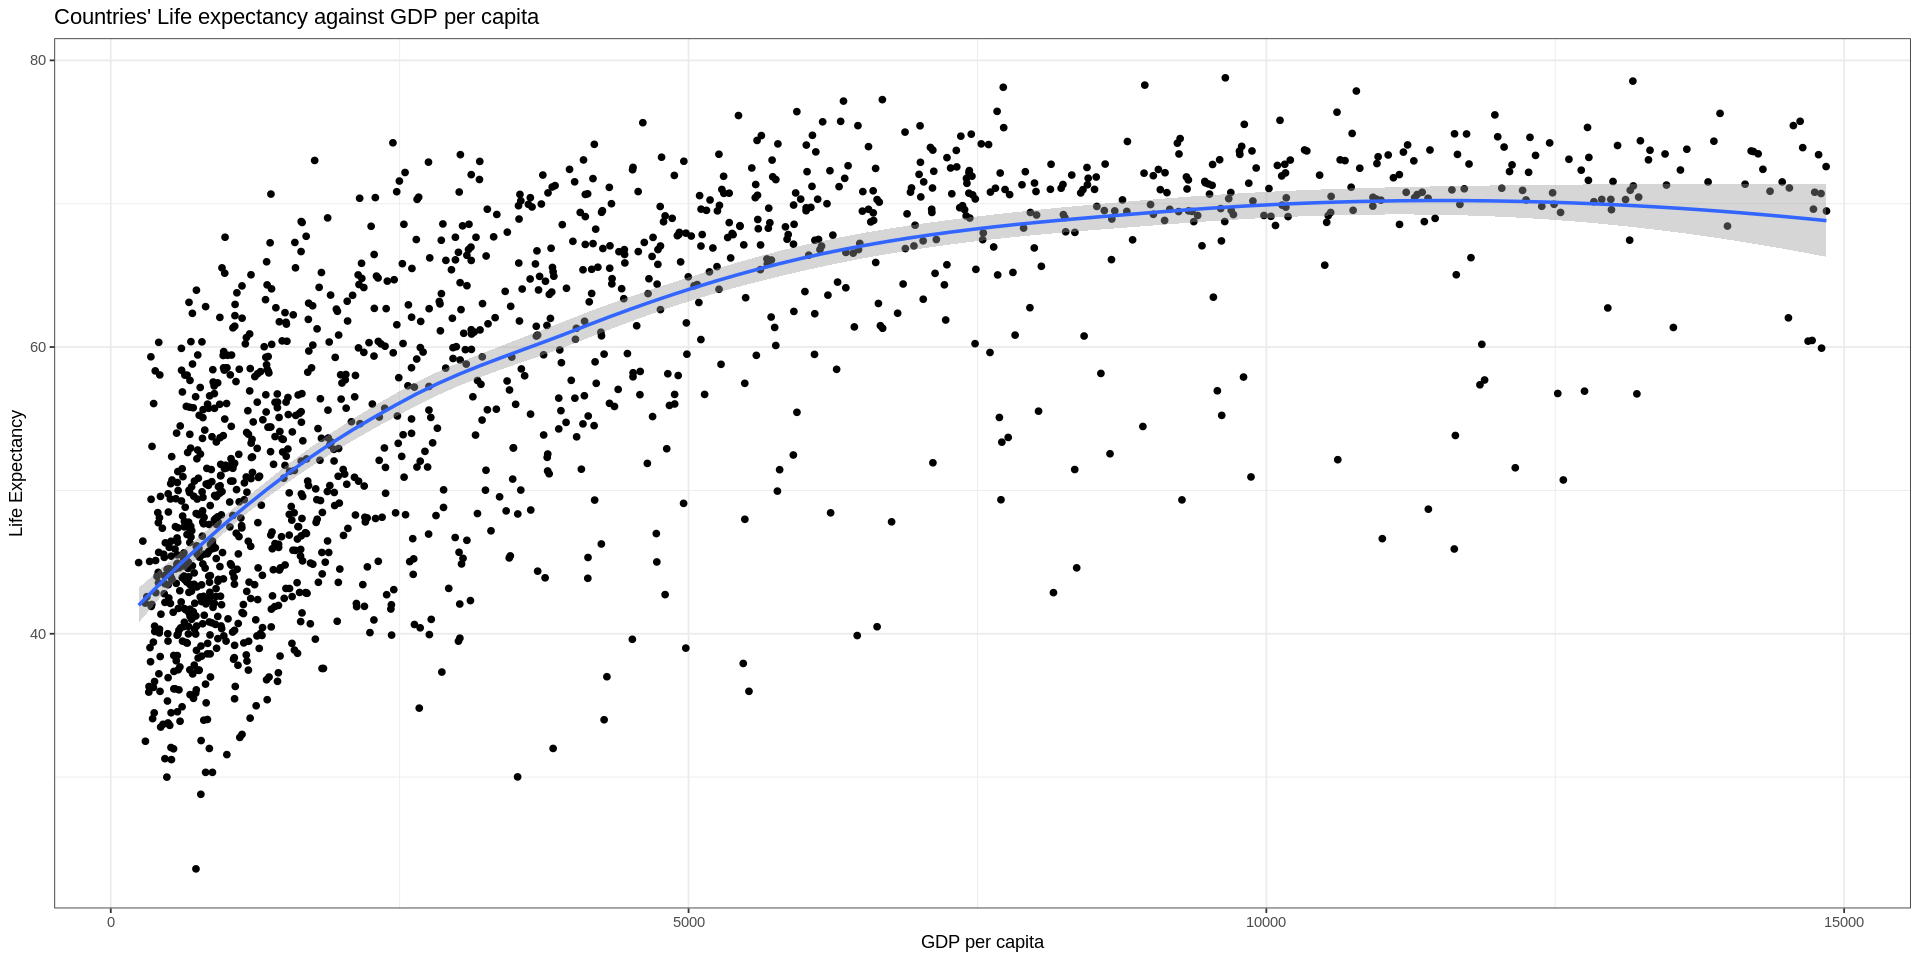

In [18]:
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_smooth(mapping = aes(x = gdpPercap, y = lifeExp), method = "loess") +  
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita") + 
  theme_bw()

### Example 3.4 (Now lets color our points and smoother by continent)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



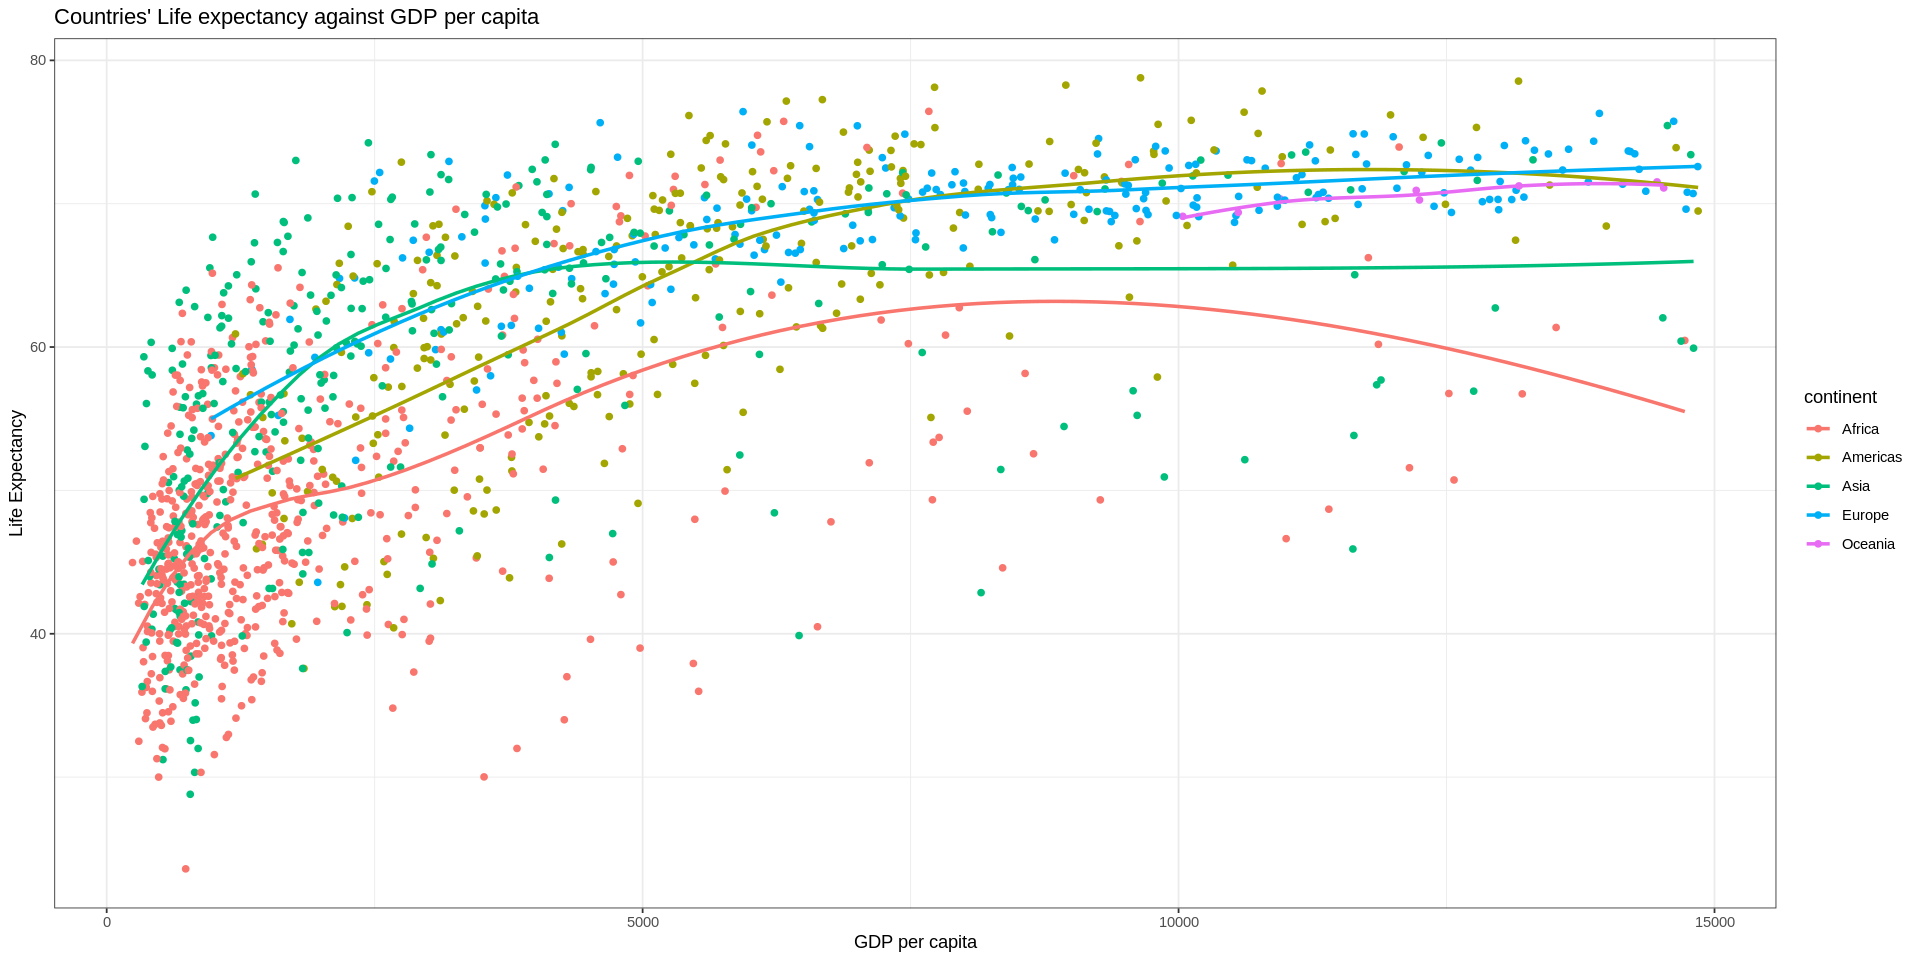

In [19]:
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_smooth(mapping = aes(x = gdpPercap, y = lifeExp, color = continent), se = F) + 
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita") + 
  theme_bw()

<br>

### Example 3.5 (Modifying previous plot with facetting)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



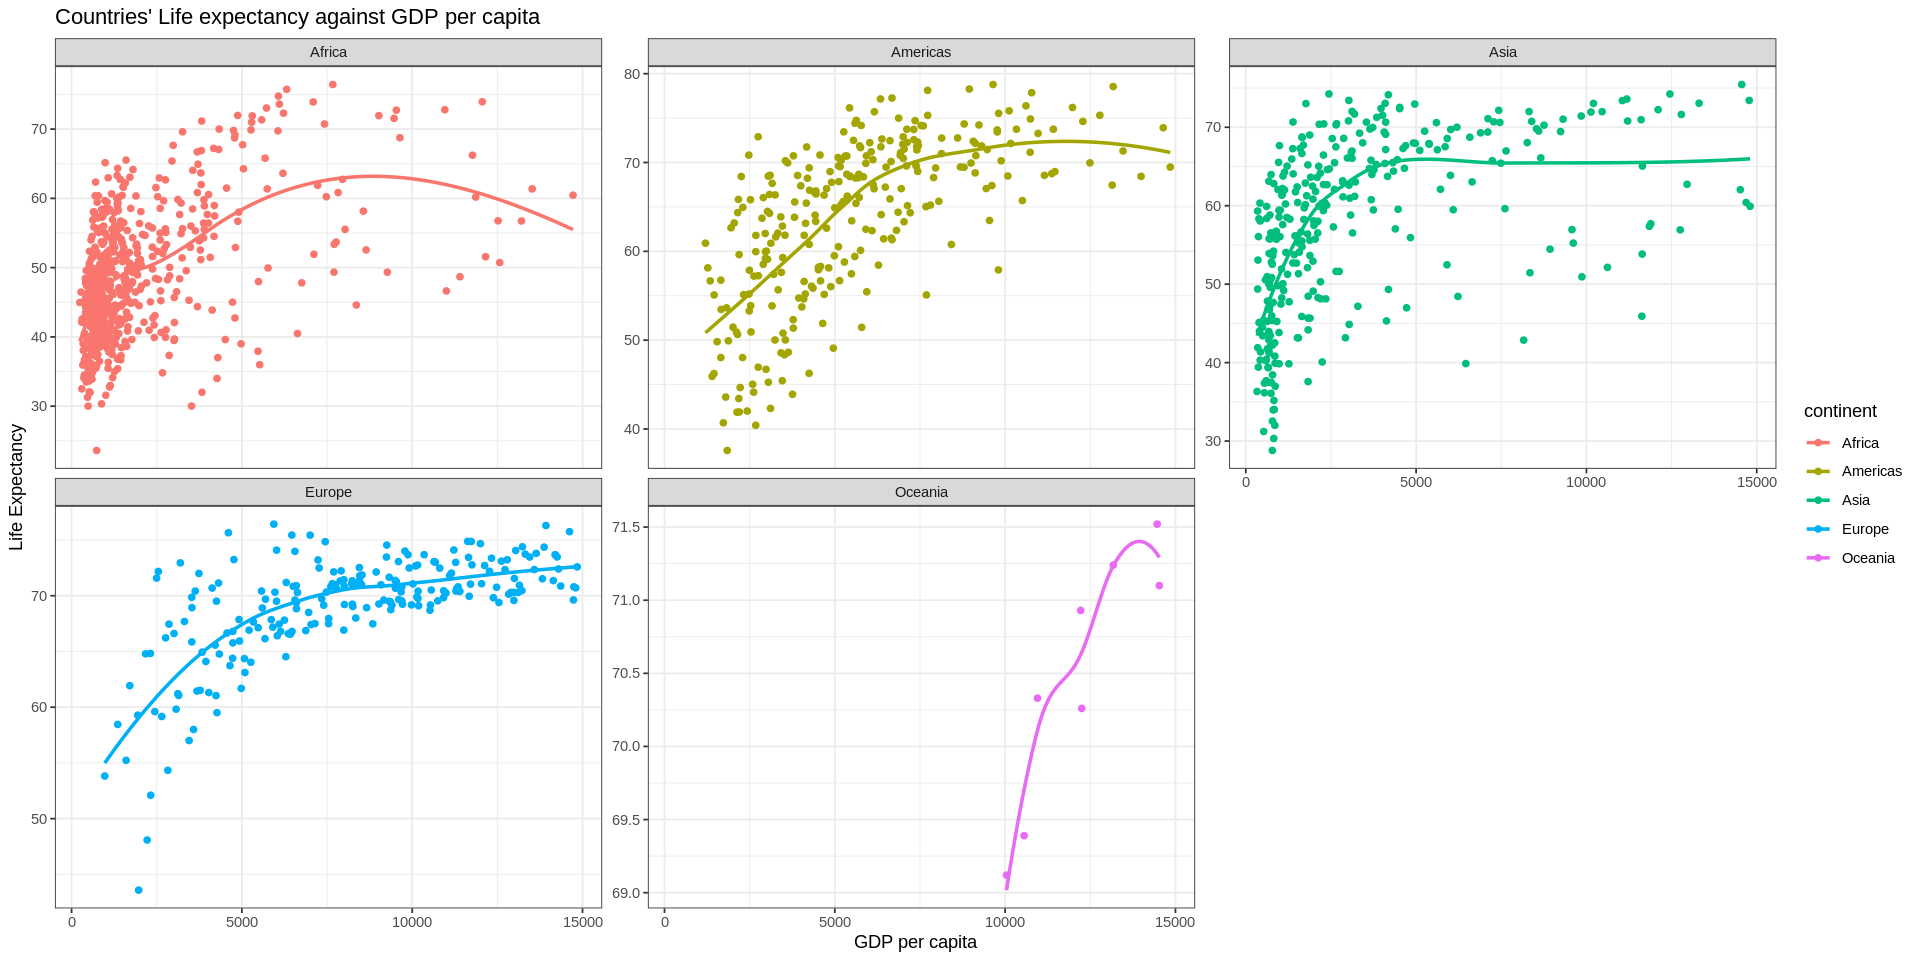

In [20]:
ggplot(data = dat) +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_smooth(mapping = aes(x = gdpPercap, y = lifeExp, color = continent), se = F) + 
  facet_wrap(~ continent, scales = "free_y") +
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita") + 
  theme_bw()

# 4. Excercise

1. Load the `iris` dataset using the `data(iris)` command. If you cannot load the data, you can install the package `datasets` where the `iris` data is found and load this package using the `library` command.   
- Plot Sepal Length against Sepal Width. You may want to view the data to identify the appropriate variable names that corresponds with this problem. (Hint: use the `head()` function). Color by `Species`, and use appropriate labels for the x and y axes and give a suitable title to your plot. You are free to change the default theme (Hint: `theme_`)
  



In [21]:
## Load and view data
data(iris)
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

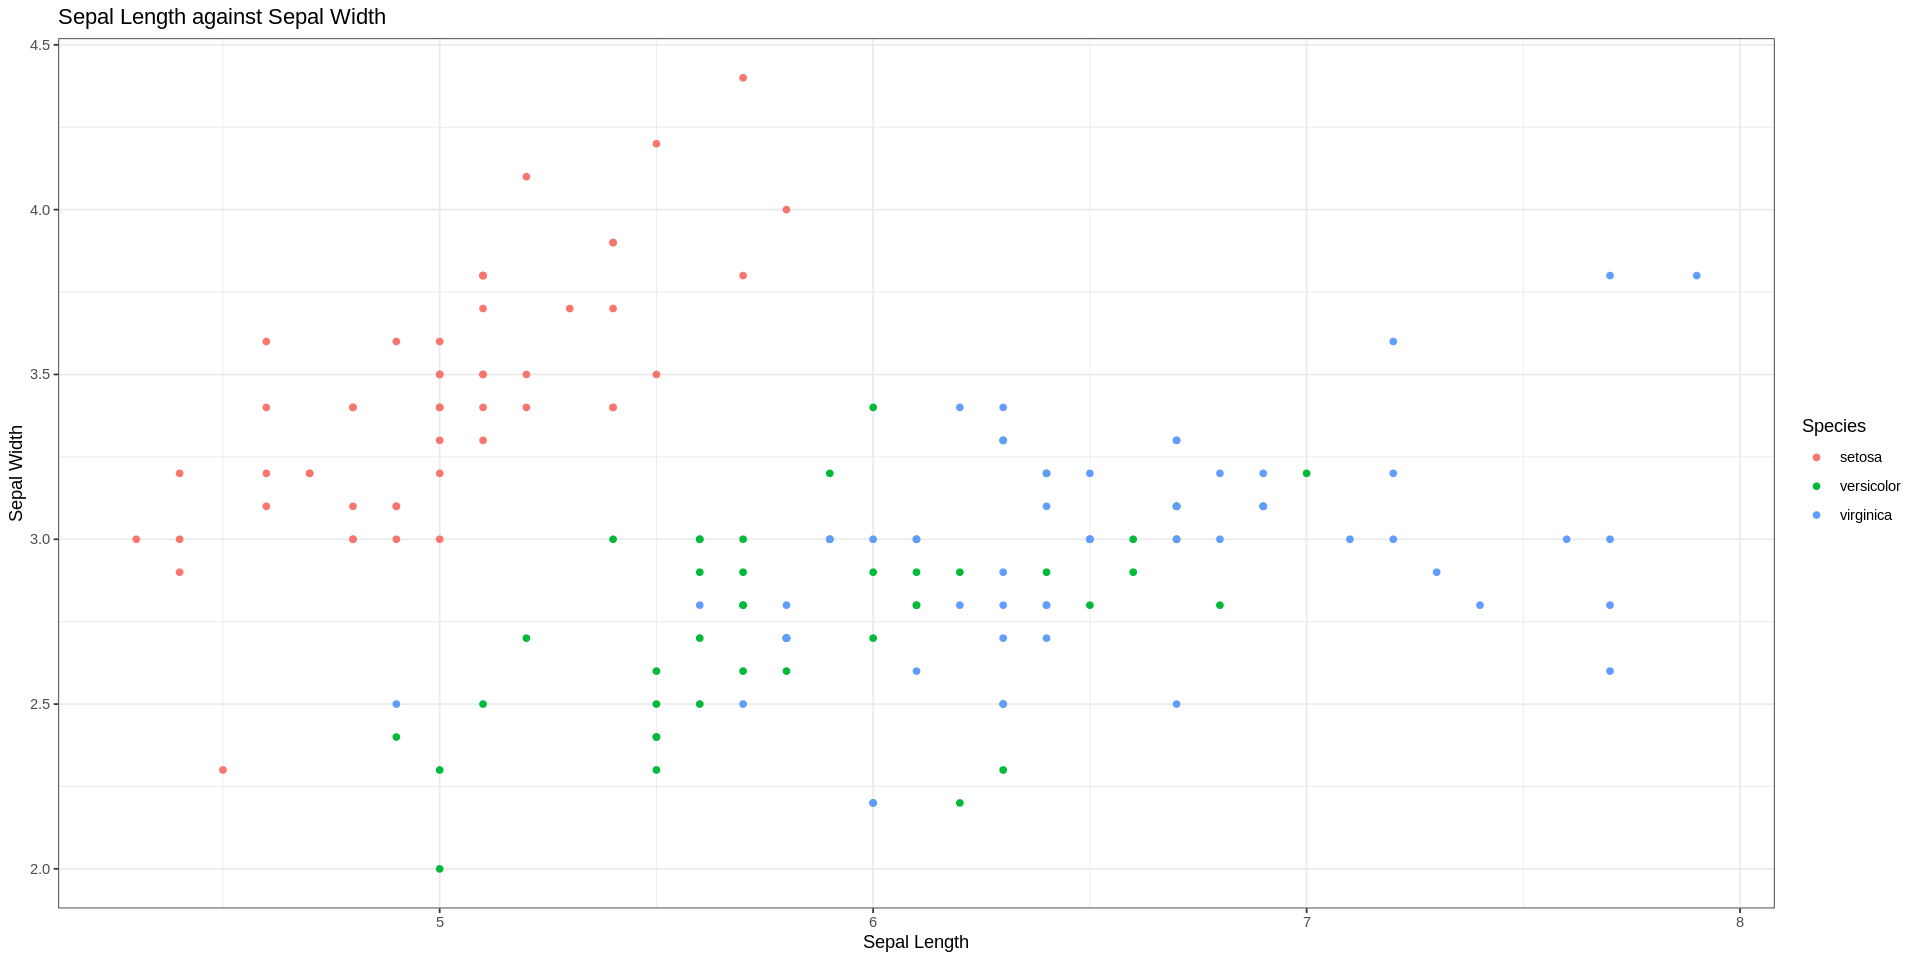

In [22]:
## Make the required plot
ggplot(data = iris) + 
  geom_point(mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + 
  labs(x     = "Sepal Length",
       y     = "Sepal Width",
       title = "Sepal Length against Sepal Width") +
  theme_bw()

- Make a facet wrap with 1 row using `Species` as your split variable. `free` both x and y axes.

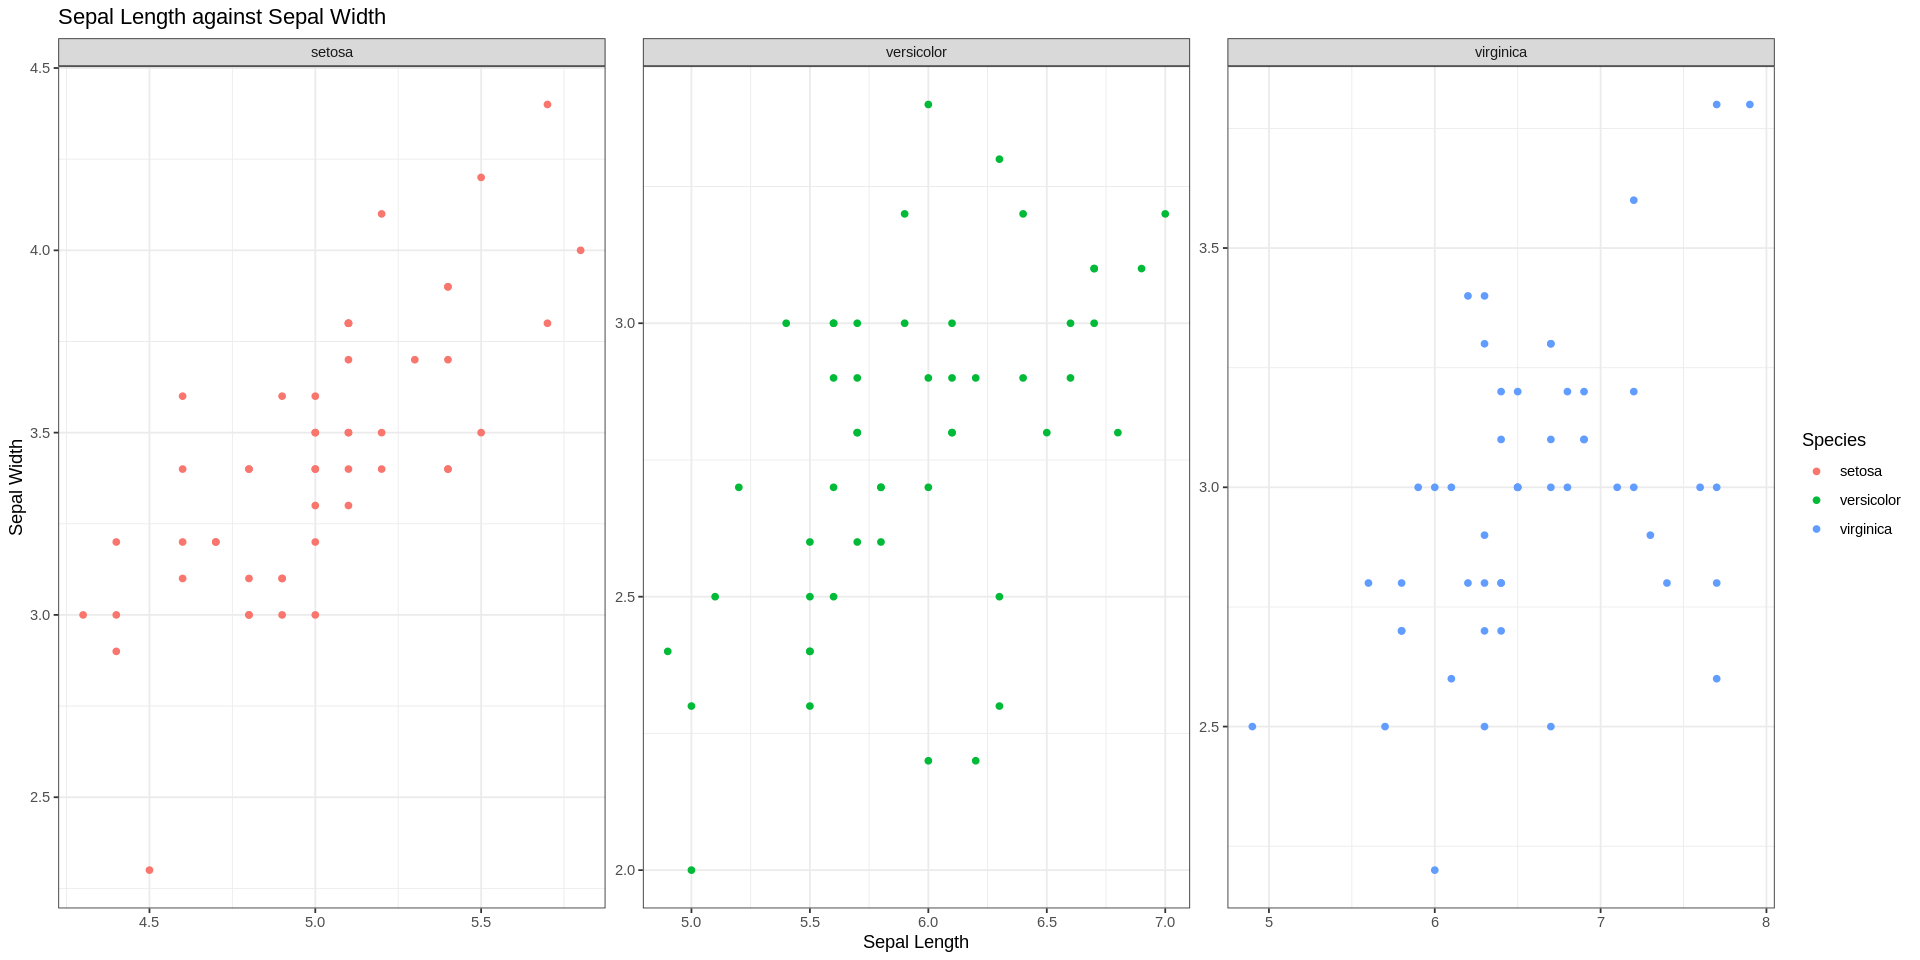

In [23]:
## Making a plot with facet_wrap
ggplot(data = iris) + 
  geom_point(mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + 
  facet_wrap(~ Species, nrow = 1, scales = "free") +
  labs(x     = "Sepal Length",
       y     = "Sepal Width",
       title = "Sepal Length against Sepal Width") +
  theme_bw()



2. You may have noticed that your scatter plots are overplotted. A fix to this problem is to add a little noise to your data using [geom_jitter()](https://ggplot2.tidyverse.org/reference/geom_jitter.html). This adds a small amount of random variation to the location of each point, and is a useful way of handling overplotting caused by discreteness in smaller datasets.
- Make a scatterplot of Sepal Length against Sepal Width for the entire dataset and add a smoothing curve to your plot (see example 3.3). Use `geom_jitter` in place of `geom_point`. What do you observe?


`geom_smooth()` using formula 'y ~ x'



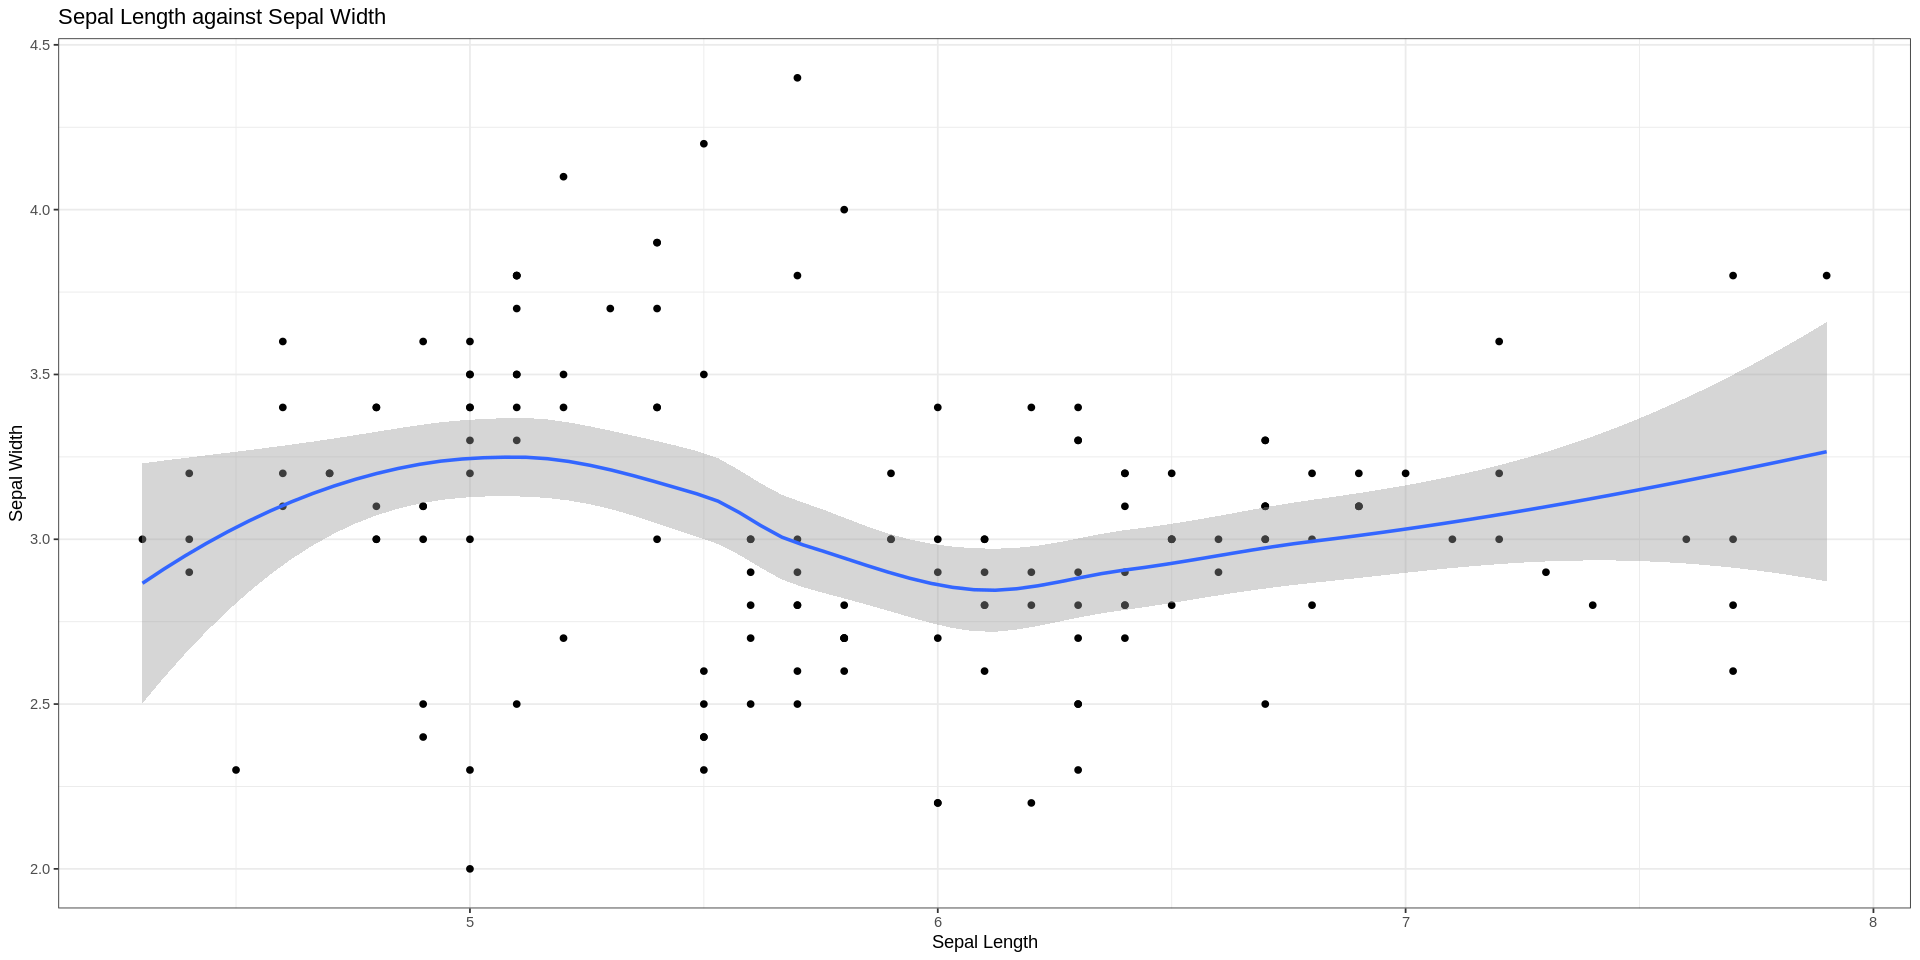

In [24]:
## Scatter plot with geom_point
ggplot(data = iris) + 
  geom_point(mapping = aes(x = Sepal.Length, y = Sepal.Width)) +
  geom_smooth(mapping = aes(x = Sepal.Length, y = Sepal.Width), method = "loess") +  
  labs(x     = "Sepal Length",
       y     = "Sepal Width",
       title = "Sepal Length against Sepal Width") +
  theme_bw()

`geom_smooth()` using formula 'y ~ x'



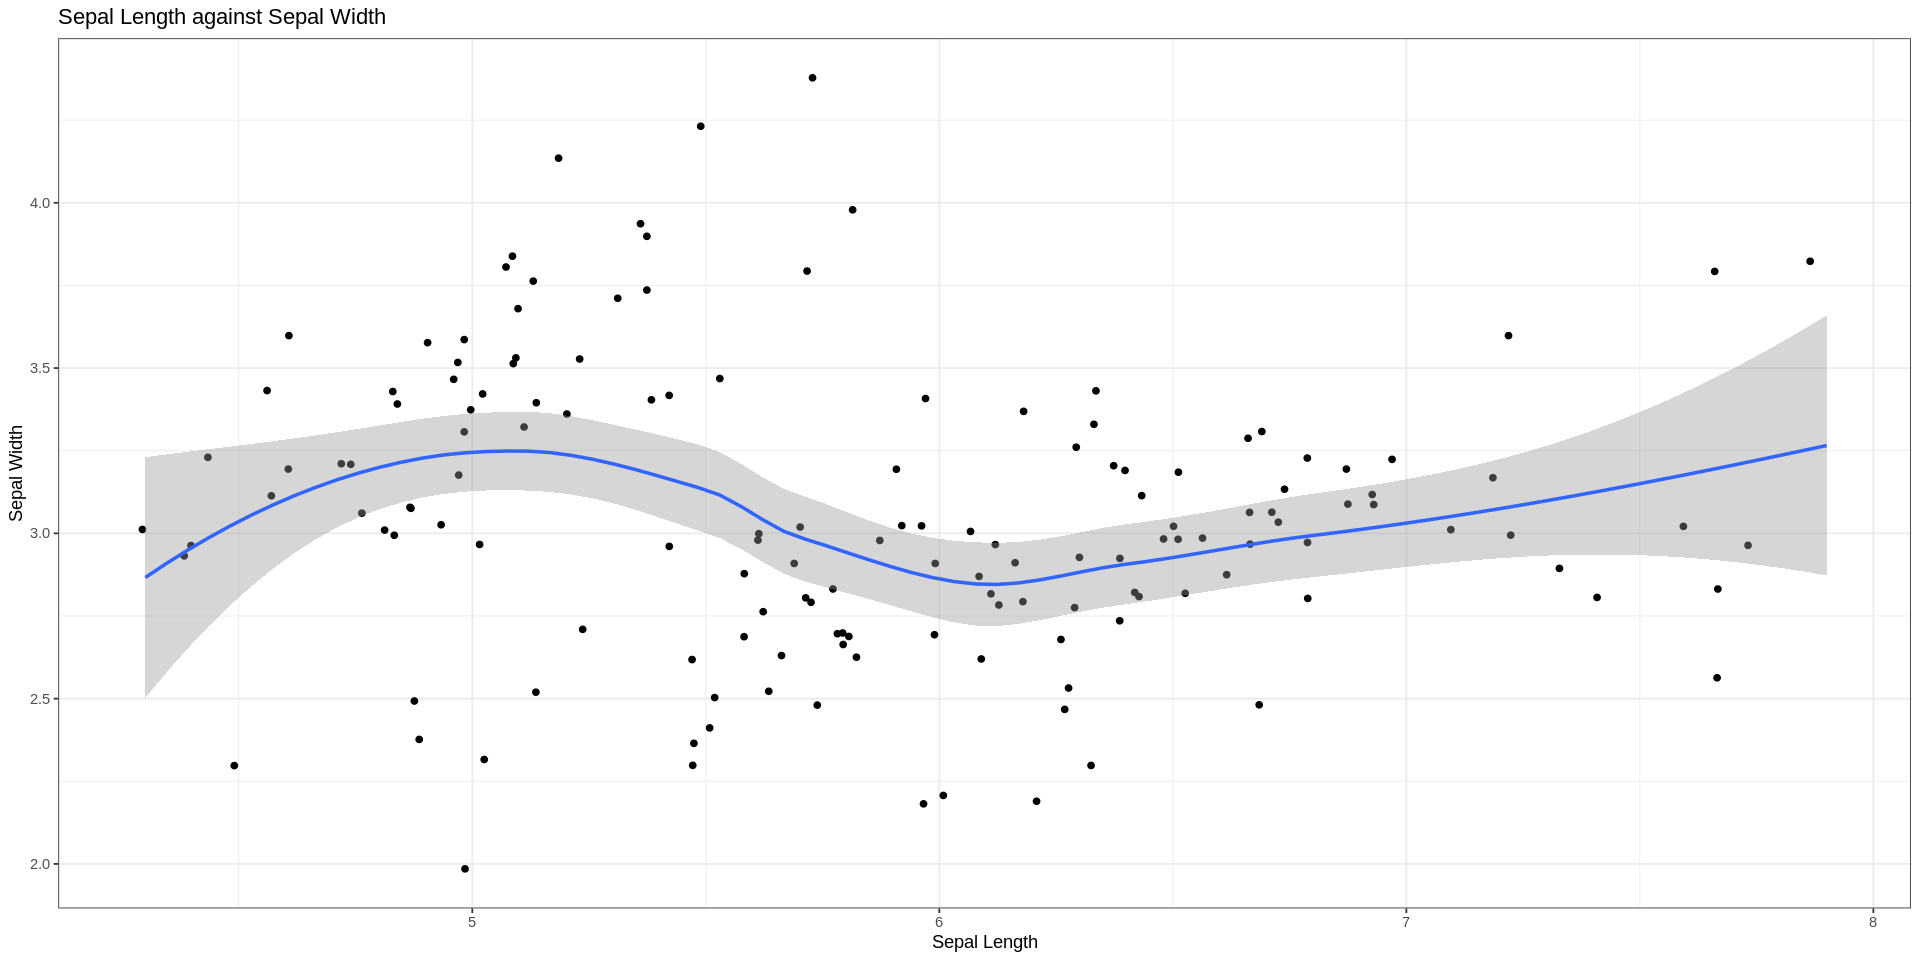

In [25]:
## Scatter plot with geom_jitter
ggplot(data = iris) + 
  geom_jitter(mapping = aes(x = Sepal.Length, y = Sepal.Width)) +
  geom_smooth(mapping = aes(x = Sepal.Length, y = Sepal.Width), method = "loess") +  
  labs(x     = "Sepal Length",
       y     = "Sepal Width",
       title = "Sepal Length against Sepal Width") +
  theme_bw()

- Now color the points by `Species` and create `geom_smooth` plots for each specie. (see example 3.5)

`geom_smooth()` using formula 'y ~ x'



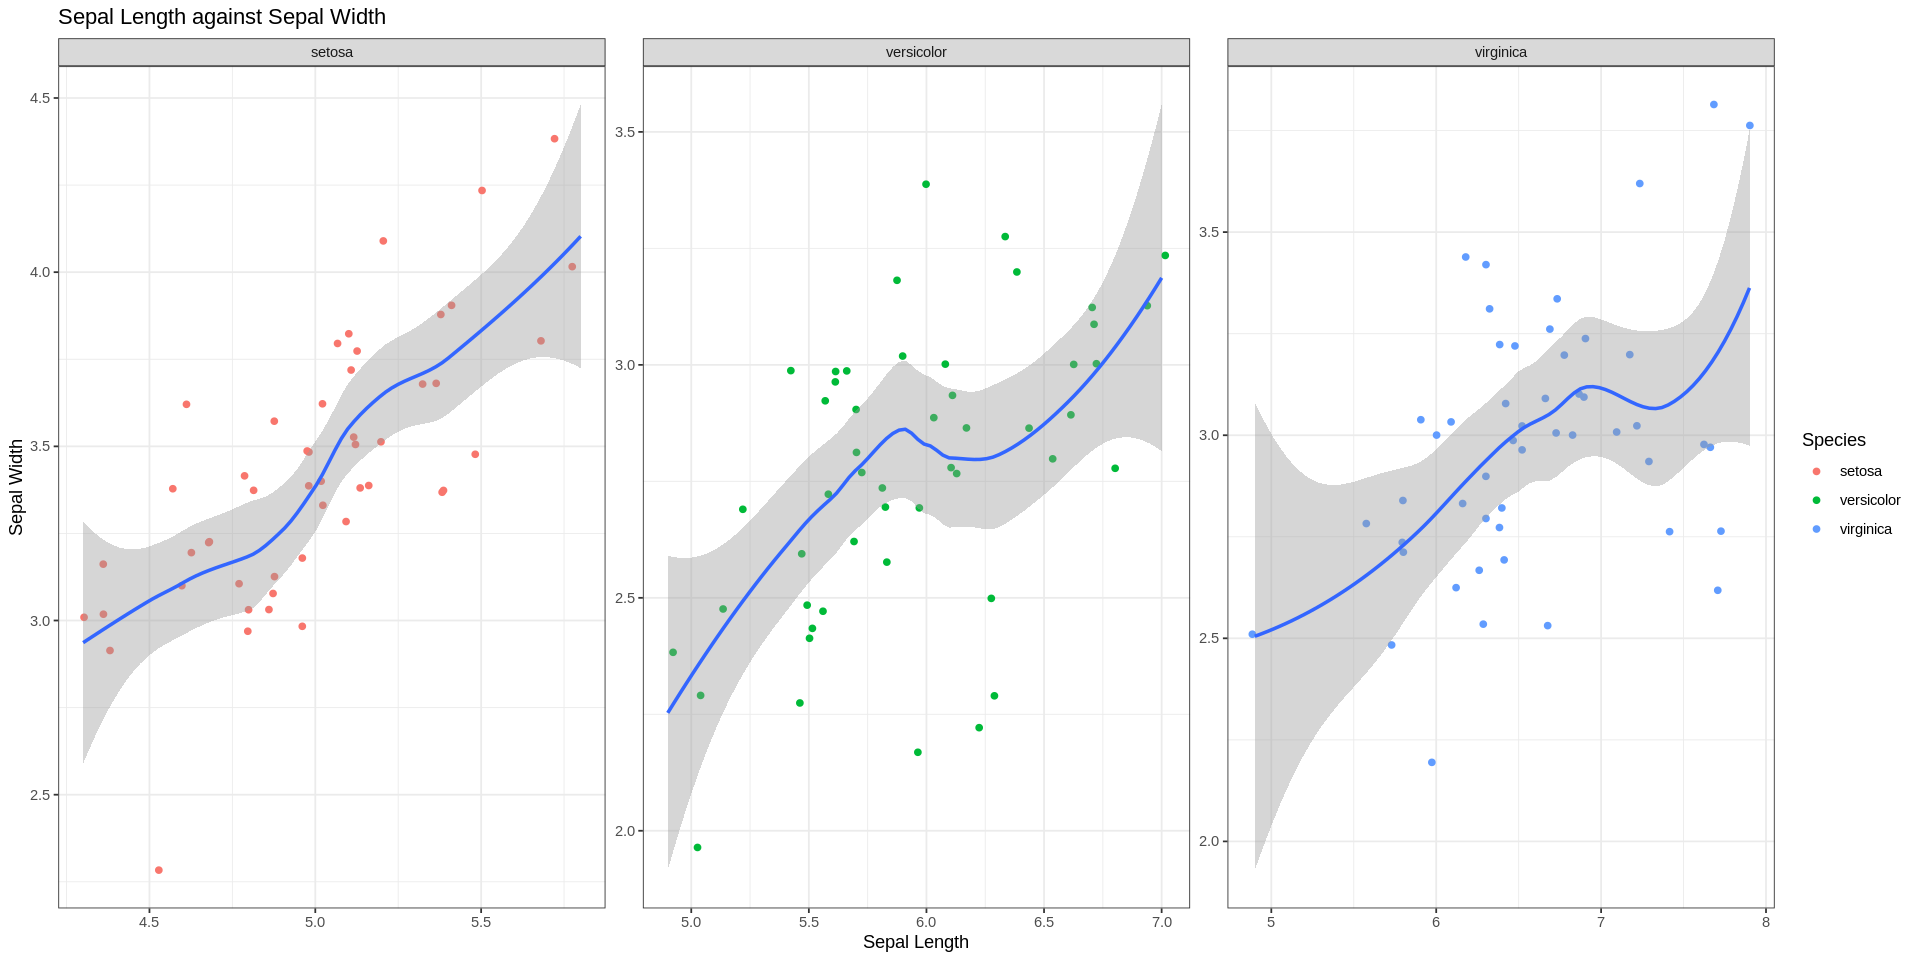

In [26]:
## Separate plot per specie 
ggplot(data = iris) + 
  geom_jitter(mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
  geom_smooth(mapping = aes(x = Sepal.Length, y = Sepal.Width), method = "loess") +  
  facet_wrap(~ Species, nrow = 1, scales = "free") +
  labs(x     = "Sepal Length",
       y     = "Sepal Width",
       title = "Sepal Length against Sepal Width") +
  theme_bw()

3. If you feel motivated, you can make a similar plot to this dataset from example 2.3. This problem can be challenging especially since we have yet to treat data manipulation. However, it is worth a try!

In [27]:
## Create the summarized data
(avg_by_specie = iris %>% group_by(Species) %>% 
  summarise(Sepal.Length = mean(Sepal.Length), Sepal.Width = mean(Sepal.Width)))

Species    Sepal.Length Sepal.Width
1 setosa     5.006        3.428      
2 versicolor 5.936        2.770      
3 virginica  6.588        2.974

`geom_smooth()` using formula 'y ~ x'



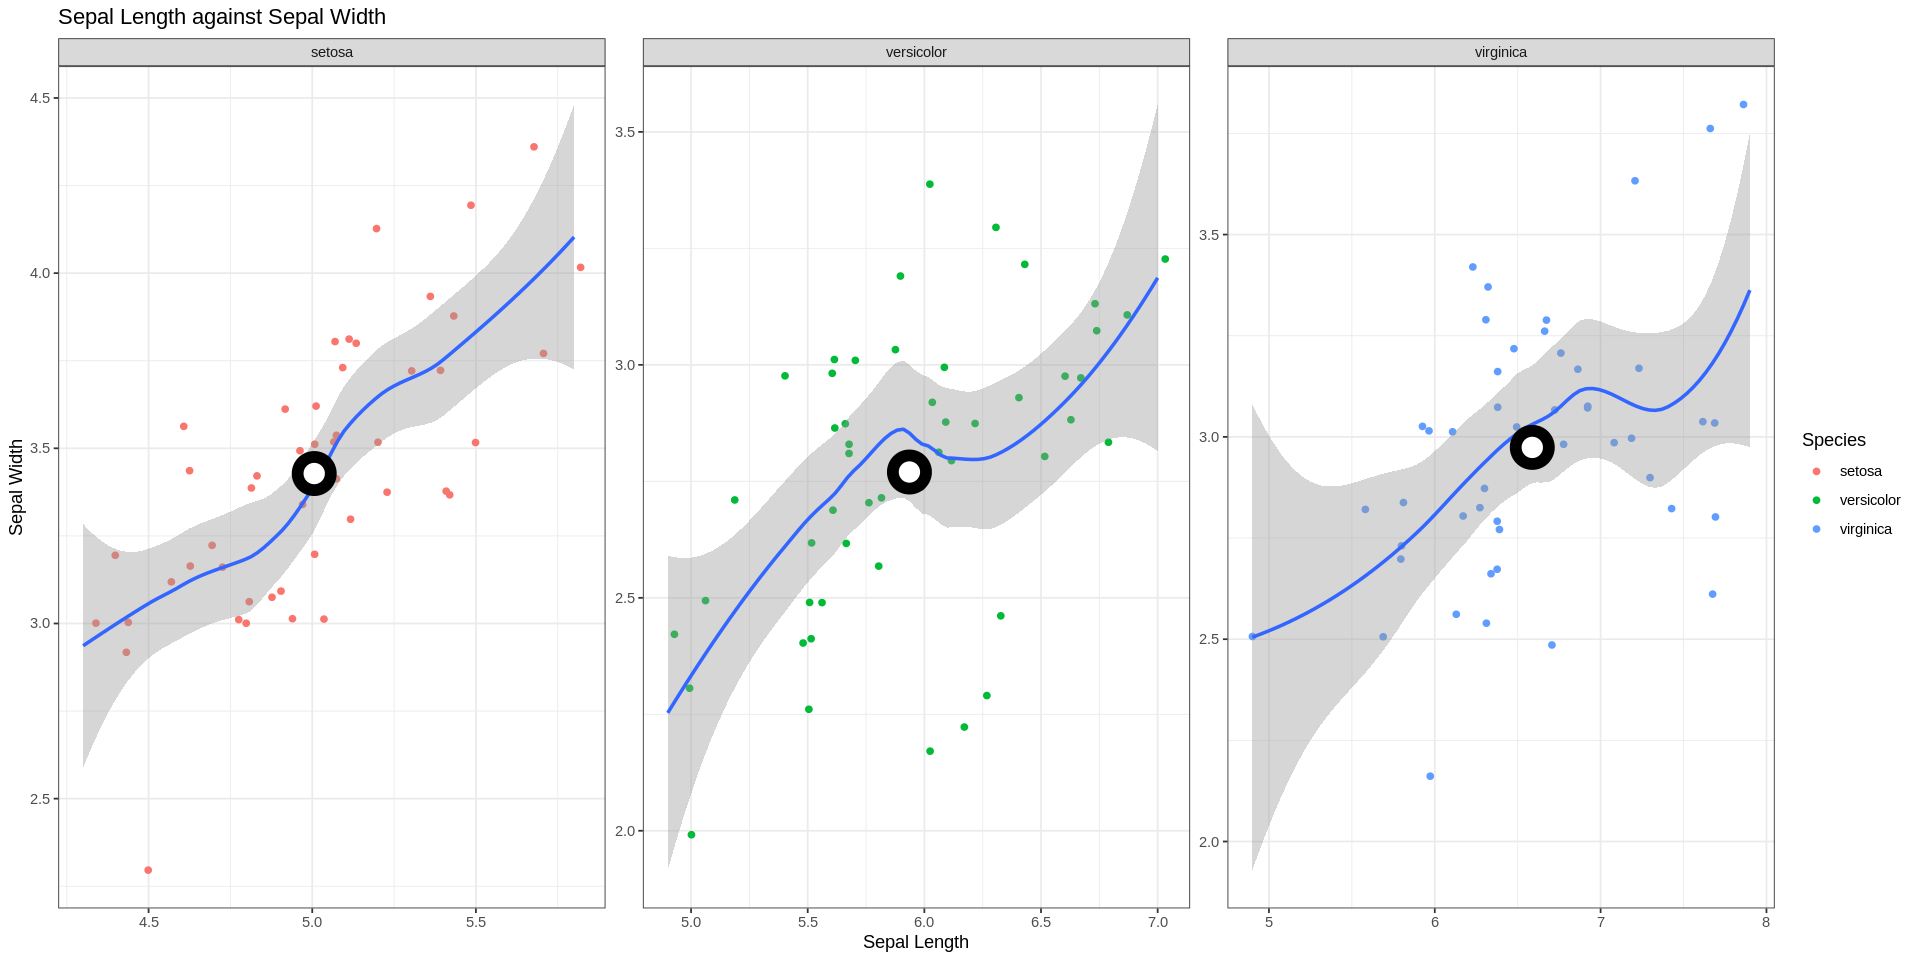

In [28]:
## Separate plot per specie 
ggplot(data = iris) + 
  geom_jitter(mapping = aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
  geom_smooth(mapping = aes(x = Sepal.Length, y = Sepal.Width), method = "loess") + 
  geom_point(data = avg_by_specie, mapping = aes(x = Sepal.Length, y = Sepal.Width),
              color = "black", size = 6, fill = "white", stroke = 5, shape = 21) +  
  facet_wrap(~ Species, nrow = 1, scales = "free") +
  labs(x     = "Sepal Length",
       y     = "Sepal Width",
       title = "Sepal Length against Sepal Width") +
  theme_bw()